<a href="https://colab.research.google.com/github/KamalRawalCS/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_%26_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV shows clustering (Unsupervised ML)



##### **Project Type**    - Unsupervised Machine learning
##### **Contribution**    - Individual
##### **Name - Kamal Rawal**



### **GitHub Link - https://github.com/KamalRawalCS/Netflix-Movies-and-TV-Shows-Clustering**

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Approaches:-

**Step 1** - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

**Step 2** - We performed 3 hypothesis testing one comparing means for two variavles using T-test , second was asssociation of target age and country using chi_square test, last was asssociation of target age and duration using chi_square test.

**Step 3** - Presence of null values would have created possible errors in the further steps, so we replaced few values with null, few with the word "unknown" few were dropped.

**Step 4** - As a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.

**Step 5** - Last step was to perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering. Recommendation system function was also developed.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#neccessary packages
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 123.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 1.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=773e47bbb75ba2c29cd295960131650e5d042dd8a642ea5dac9743f4797b5683
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
content_df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
content_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows=content_df.shape[0]
columns=content_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


### Dataset Information

In [6]:
# Dataset Info
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:

# Dataset Duplicate Value Count
content_df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique values

In [8]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
Complete_columns_info(content_df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

<Axes: >

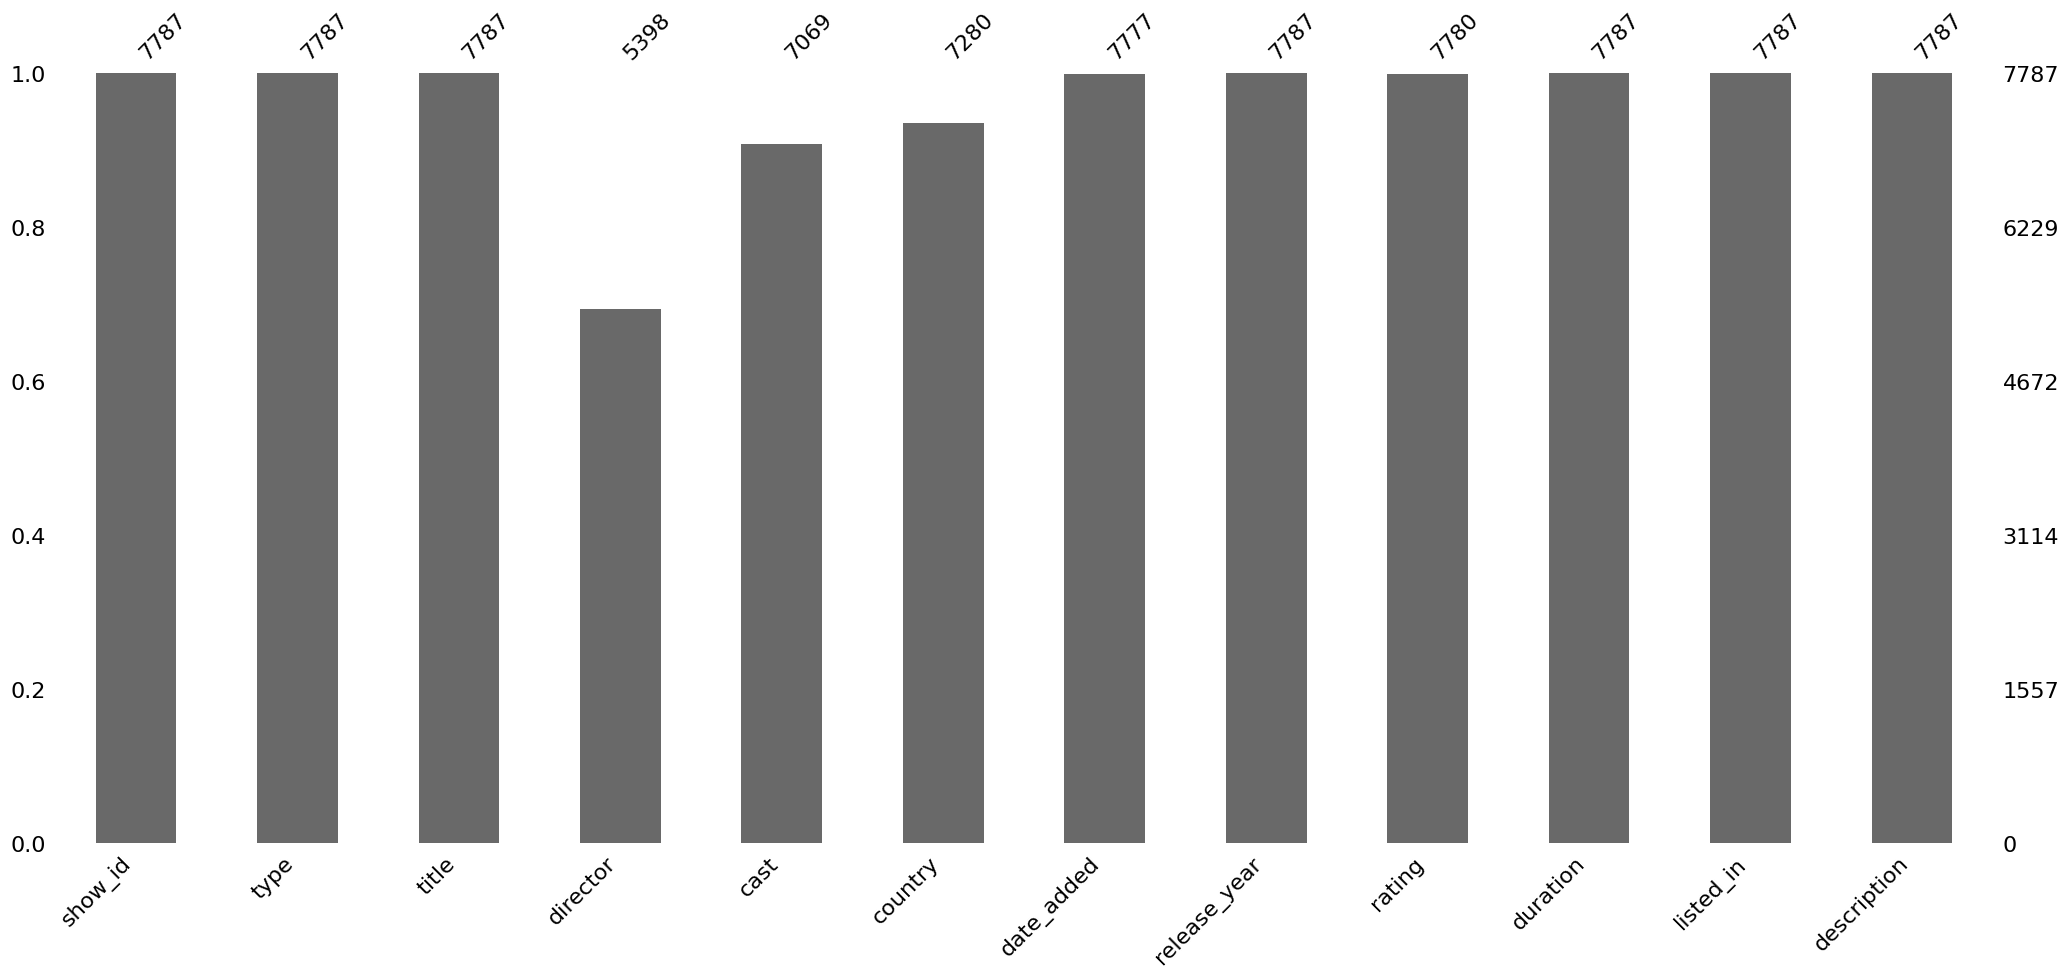

In [10]:
# Visualizing the missing values
msno.bar(content_df)

*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
content_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
content_df.describe().style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

### Variables Description

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Show_id|Unique id for every movie/TV show||Release_year|Actual release year of the show|
|Type|Identifier - Movie/tv show||Rating|TV rating of the show|
|Title|Title of the show/movie||Duration|Total duration in minutes or number of seasons|
|Director|Director of the show||Listed_in|Genre|
|Cast|Actors involved||Description|Summary description|
|Country|Country of production||Date_added|Date it was added on netflix|

### Check Unique Values for each variable.

In [13]:
Complete_columns_info(content_df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
content_df["date_added"] = pd.to_datetime(content_df['date_added'])

# Compute day.
content_df['day_added'] = content_df['date_added'].dt.day

# Compute year.
content_df['year_added'] = content_df['date_added'].dt.year

# Compute mount.
content_df['month_added'] = content_df['date_added'].dt.month

#  Creating two extra columns
tv_shows=content_df[content_df['type']=='TV Show']
movies=content_df[content_df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = content_df[content_df['type']=='Movie'].copy()
df_shows = content_df[content_df['type']=='TV Show'].copy()

# fixing data types
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
content_df['ratings_cat'] = content_df['rating'].replace(to_replace = custom_rating)
content_df['ratings_cat'].unique()

content_df['type'] = pd.Categorical(content_df['type'])

# ratings_cat is another category (4 classes)
content_df['ratings_cat'] = pd.Categorical(content_df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# changing dtype to string
content_df['type']= content_df['type'].astype('string')
content_df['title']= content_df['title'].astype('string')
content_df['director']= content_df['director'].astype('string')
content_df['cast']= content_df['cast'].astype('string')
content_df['country']= content_df['country'].astype('string')
content_df['rating']= content_df['rating'].astype('string')
content_df['listed_in']= content_df['listed_in'].astype('string')
content_df['description']= content_df['description'].astype('string')

*   Date time column was converted into datetime format and information like day, month and year was extracted from it into new columns.
*   Dataset was split into separate datasets with respect to 'type' column i.e., movie and TV shows for better insights.

*   Duration Manipulation:
      * Movies dataframe: duration is converted into integer
      * TV shows dataframe: 'seasons' word was removed and only integer value was kept as number of seasons.



*   There were several categories in rating column so for better understanding we categorized it into 4 basic categories i.e., kids, older kids, teens and adults.

*   Suitable columns datatypes were converted from object type to string format to make the data processable.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#**Univariate Analysis**

#### Chart - 1

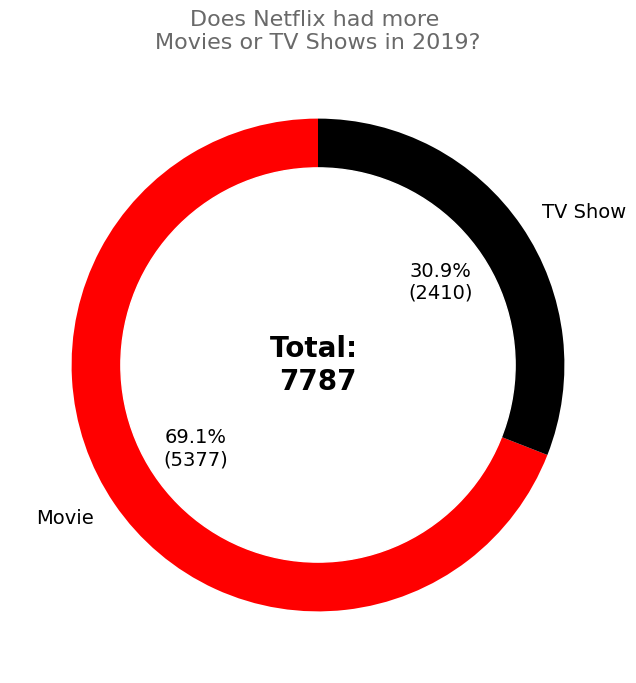

In [15]:
# Balance of Netflix products
plot_donut_chart(df=content_df, col='type', colors=['red','black'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

* Donut chart is a great way to represent share of various attributes in total pool.

* There are more number of movies **(~70%)** than TV shows **(~30%)** on netlix dataset.

* There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retension due to more duration and story complexity.

#### Chart - 2

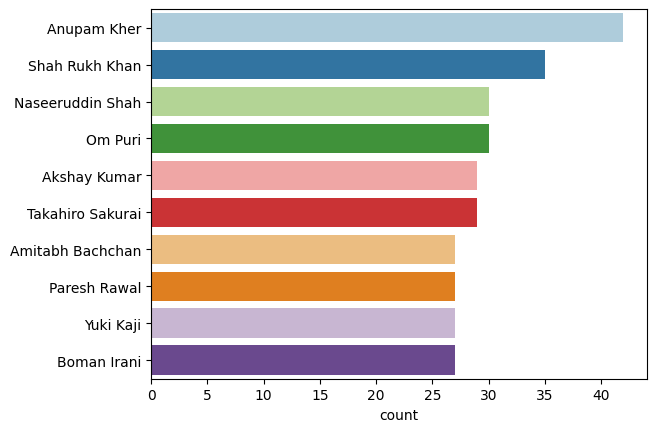

In [16]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = content_df[content_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

* Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

* The above graph shows top 10 actors who have worked in loads of movies and TV shows  

* It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 3

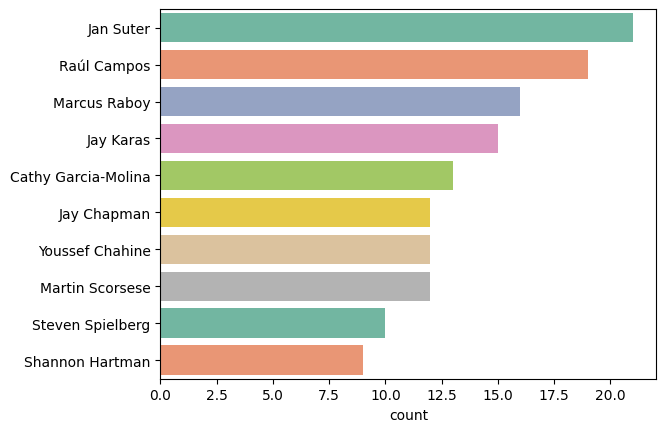

In [17]:
# Chart - 3 visualization code
# graph for different rating on movies and tv shows
# Graph for top 10 directors
directors = content_df[content_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

* we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

* This visual shows Jan suter and Raul Campos are the leading directors, with abundant experience.

* It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 4

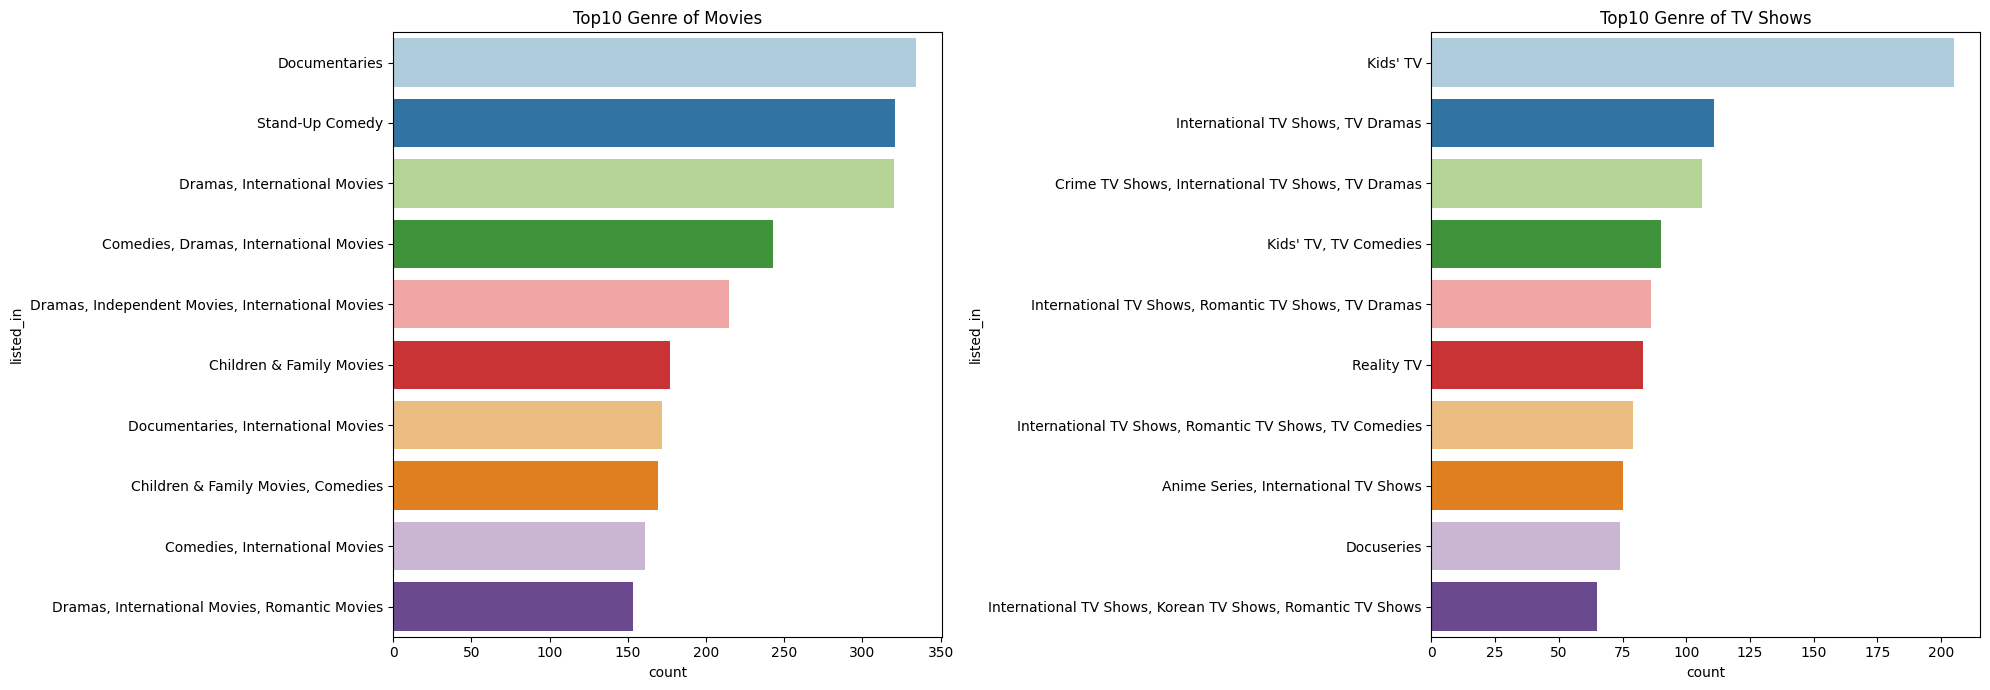

In [18]:
# Chart - 4 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

* we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

*   Documentaries are the top most genre in the netflix movies
*   Kids TV is the top most genre in netflix TV shows.


* According to personal experience and observation comedy movies are more preferred but are less in database, thus it should be promoted to attract wide audience.

#### Chart - 5

Text(0.5, 0, 'Month -> (Content added to Netflix) ')

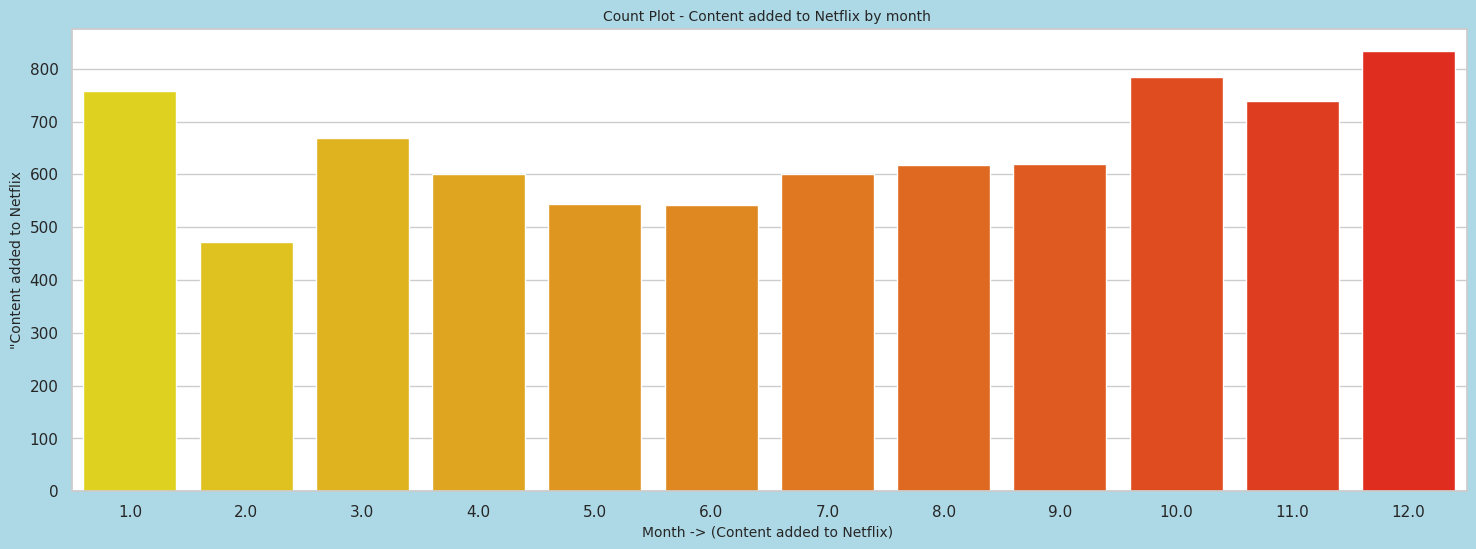

In [19]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=content_df,x = 'month_added',palette ="autumn_r")
plt.title('Count Plot - Content added to Netflix by month ', fontsize=10)
plt.ylabel('"Content added to Netflix', fontsize=10)
plt.xlabel('Month -> (Content added to Netflix) ', fontsize=10)


* we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

* Most of the movies were found to be released in the month of october, november, december and january.

* There is wide gap in new content release in mid year, so this can be filled.

#### Chart - 6

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

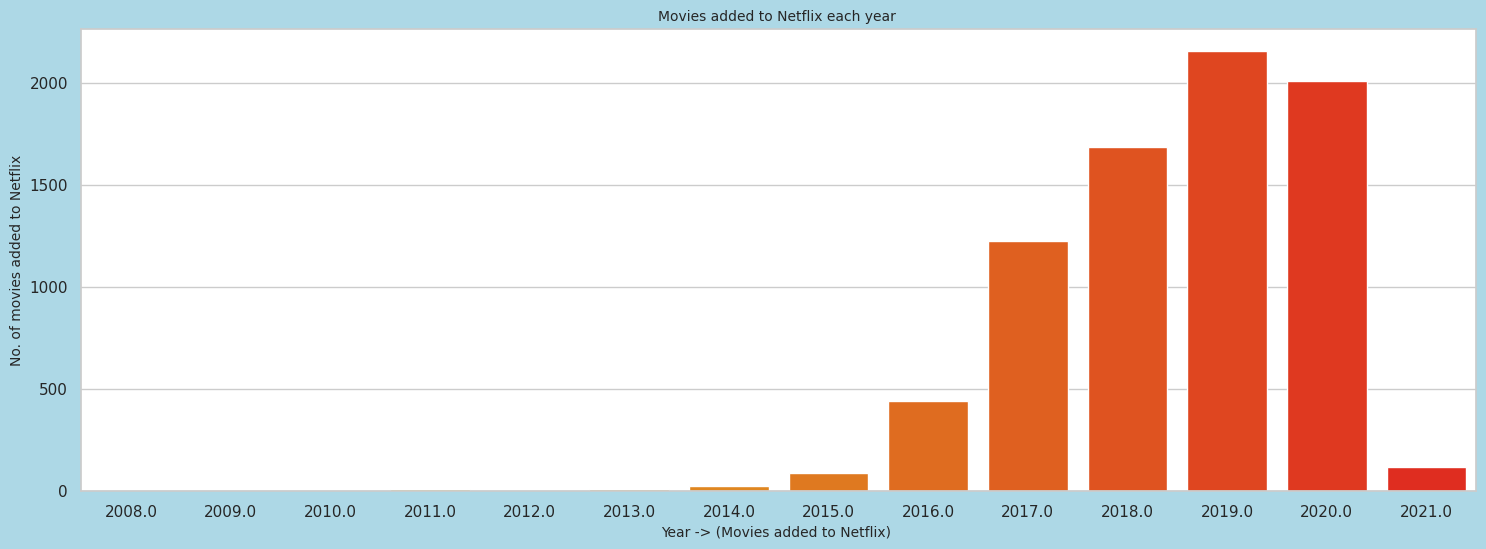

In [20]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = content_df,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

* we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

* There is linear augmentation in the release of movies from the year 2015 with its peak in the year 2019 followed by a sudden downfall in the year 2021, which was due to covid (lockdown).

* Due to covid outbreak large number of audience is inclining towards OTT platforms than physical theatres.

#### Chart - 7

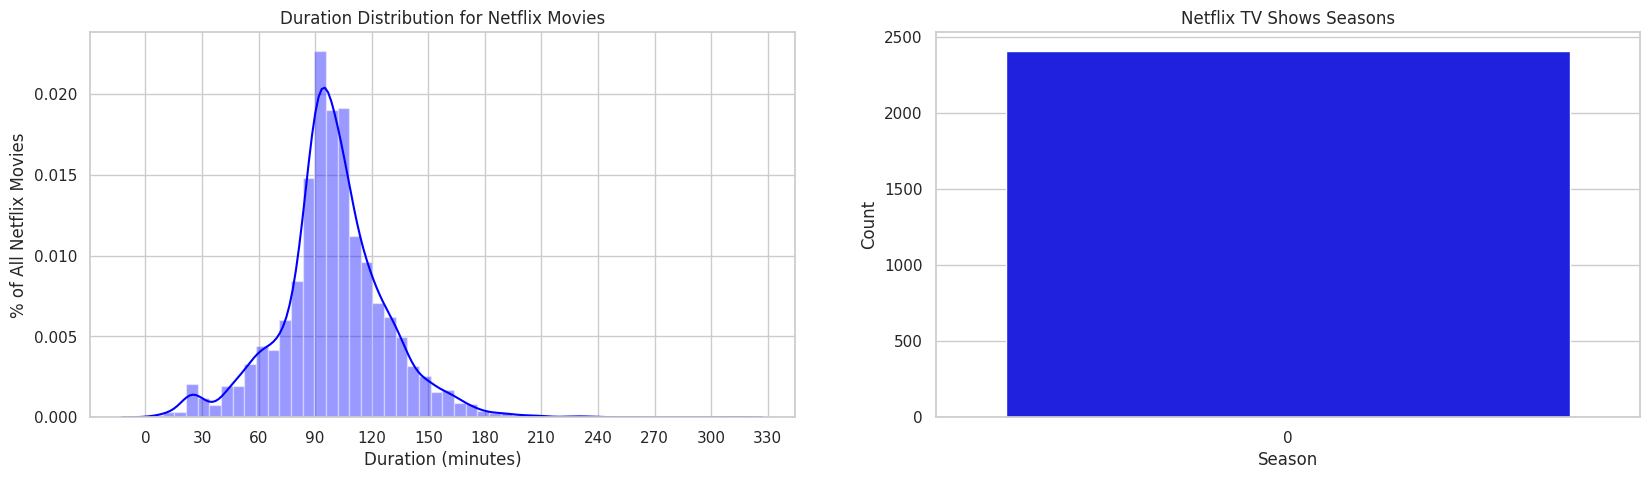

In [21]:
# Chart - 7 visualization code
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

* Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.


*   Most of the movies have duration of 90 mins.
*   Most of the TV shows have one season, but this number goes on decreasing with increase in number seasons.


#### Chart - 8

([<matplotlib.patches.Wedge at 0x7f1885678c40>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

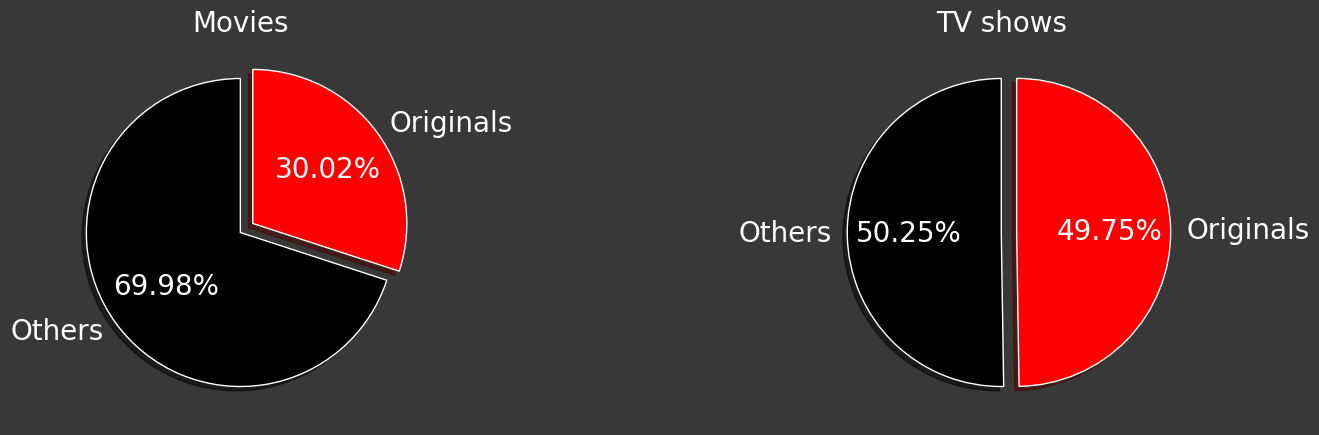

In [22]:
# Chart - 8 visualization code
df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white', fontsize = 20)
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])
# pie plot showing percentage of originals and others in TV_shows
df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year_added'], 'Yes', 'No')
ax[1].set_title('TV shows', color='white', fontsize = 20 )
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

* We have used pie chart to present education column, Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

*   Movies: 30% of the movies are netflix originals and remaining 70% movies are added on netflix which were released by different modes.
*   TV shows: 50% of the TV shows are netflix originals and remaining 50% TV shows are added on netflix which were released by different modes.



* We can add more number of netflix original movies.

#**Bivariate Analysis**

#### Chart - 9

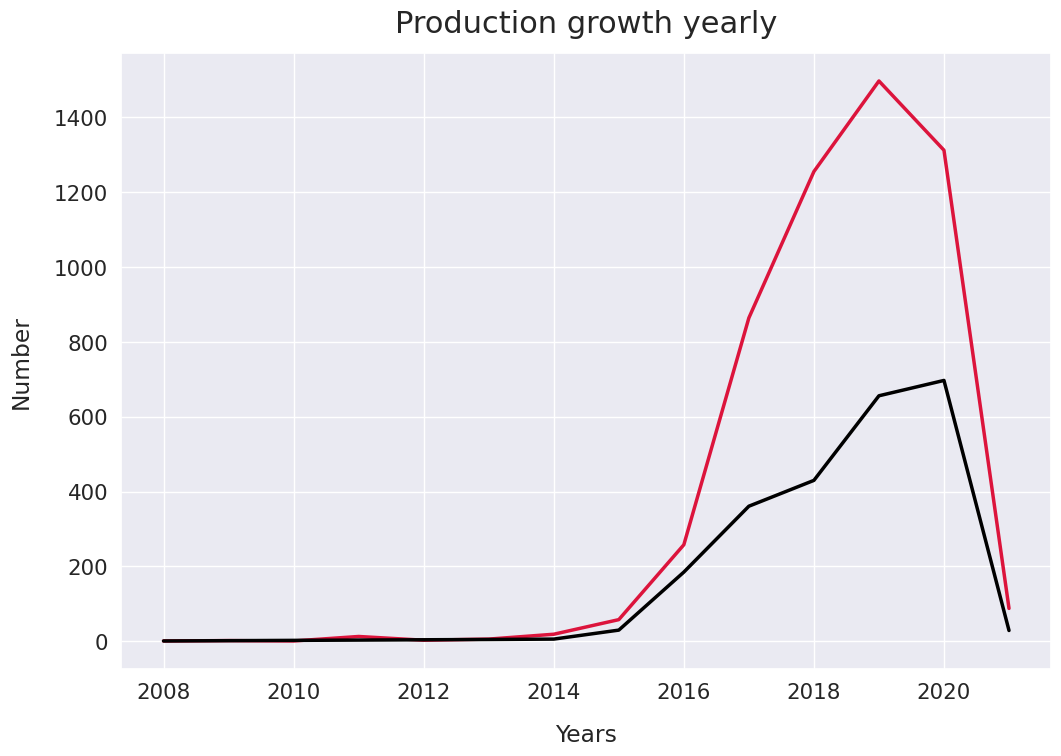

In [23]:
# Chart - 9 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year_added'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

* In the year 2019 more number of movies were released as compared to TV shows.

* There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retention due to more duration and story complexity.

#### Chart - 10

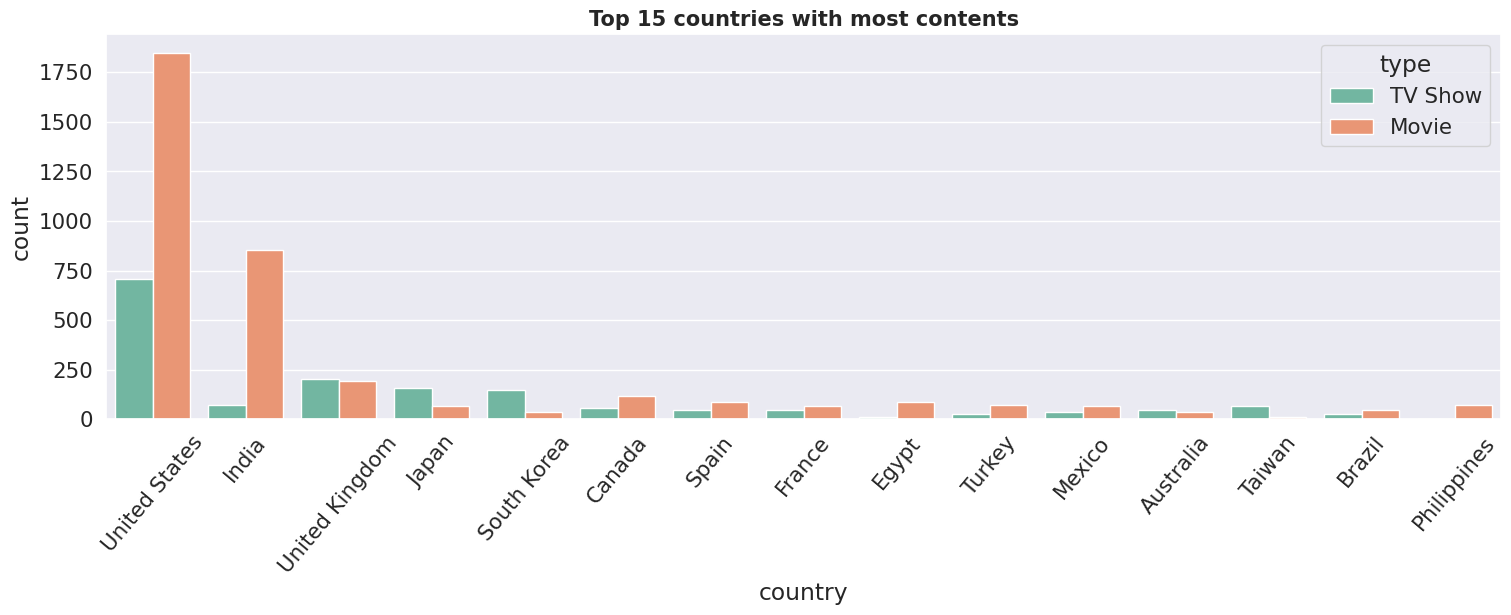

In [24]:
# Chart - 10 visualization code
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=content_df['country'],order=content_df['country'].value_counts().index[0:15],hue=content_df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

* Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

* United States has highest number of contents in Netflix followed by India.

* As we can see that very large variety of content is not available for India and severl other countries thus missing variety should be made available for other countries to provide better options for audience and to increase engagement.

#### Chart - 11

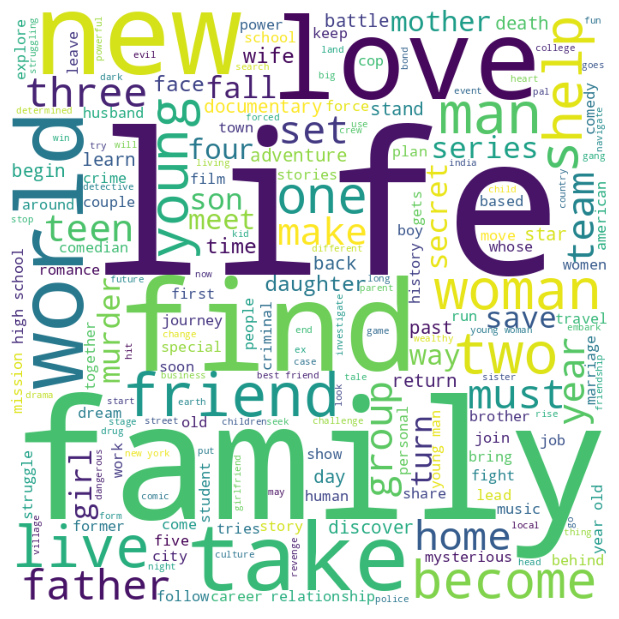

In [25]:
# Chart - 11 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in content_df.description.values:

    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image
plt.figure(figsize = (15,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

* A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.


* Family, Life, Find, Love are the most used words in the description column.

#### Chart - 12

<BarContainer object of 11 artists>

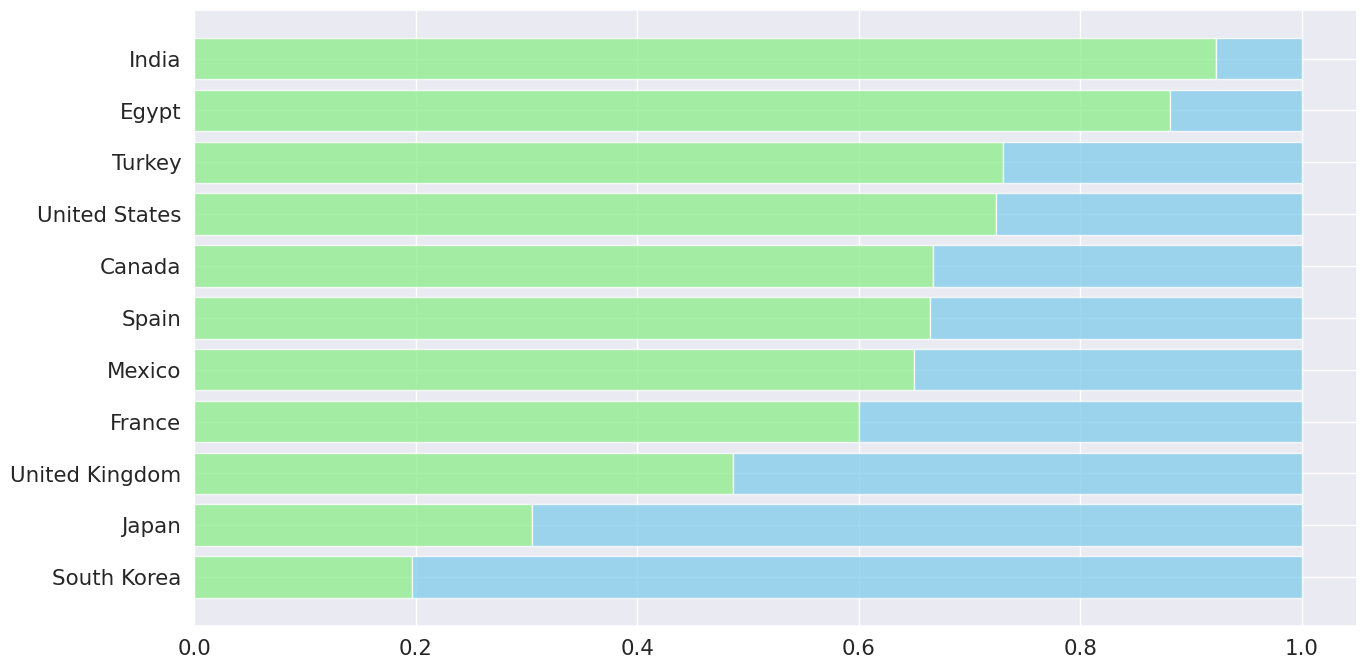

In [26]:
# Chart - 12 visualization code
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = content_df['country'].value_counts()[:11].index
content_data = content_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='lightgreen', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='skyblue', alpha=0.8, label='TV Show')

* Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

* India has number of movies releases than TV shows followed by Egypt with highest movie releases and less TV shows.

* India has less number TV shows as compared to other countries, thus this gap can be filled by producing more TV shows originated in India.

#### Chart - 13

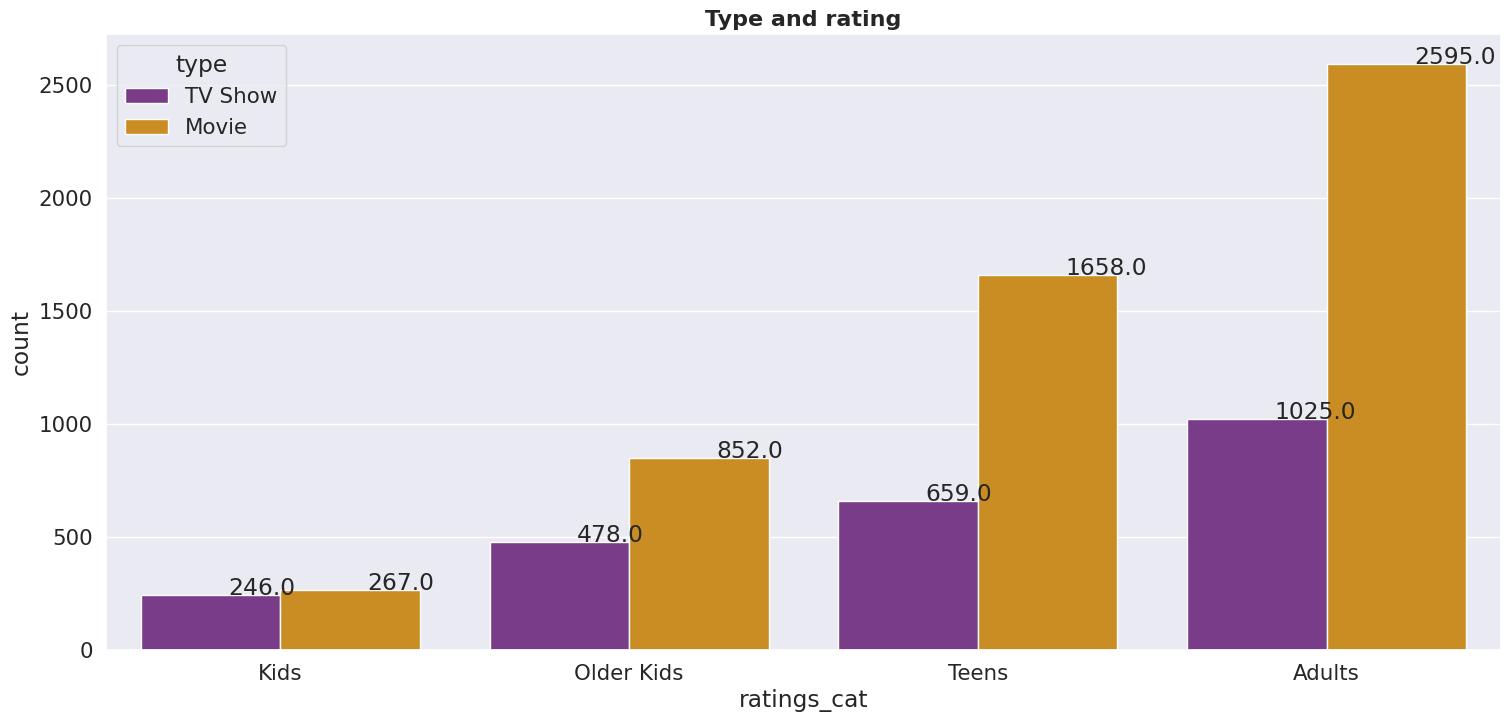

In [27]:
# Chart - 13 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='ratings_cat',hue='type', data=content_df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

* Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

* Netflix has more content in the adult section followed by teen section.

#**Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

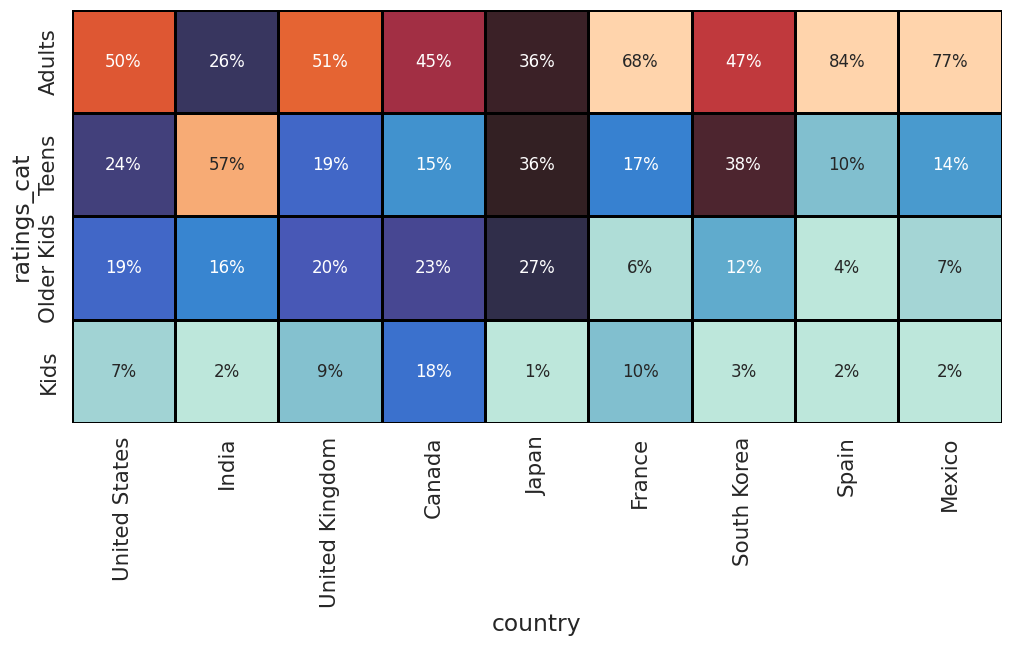

In [28]:
# Correlation Heatmap visualization code
content_df['count'] = 1
data = content_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap_df = content_df.loc[content_df['country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['country'],heatmap_df['ratings_cat'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order,country_order2],cmap='icefire',annot=True, linecolor='Black', linewidths=1.0,square=True, cbar=False,
            fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

* Correlations are best represented  using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

* United States and United Kingdom are closely alighned with their netflix target ages.

1. Maximum adult content is from Spain.
2. Maximum teen content is from India.
3. Maximum older kids content is from Japan.
4. Maximum kids content is from Canada.









#### Chart - 16 - Pair Plot

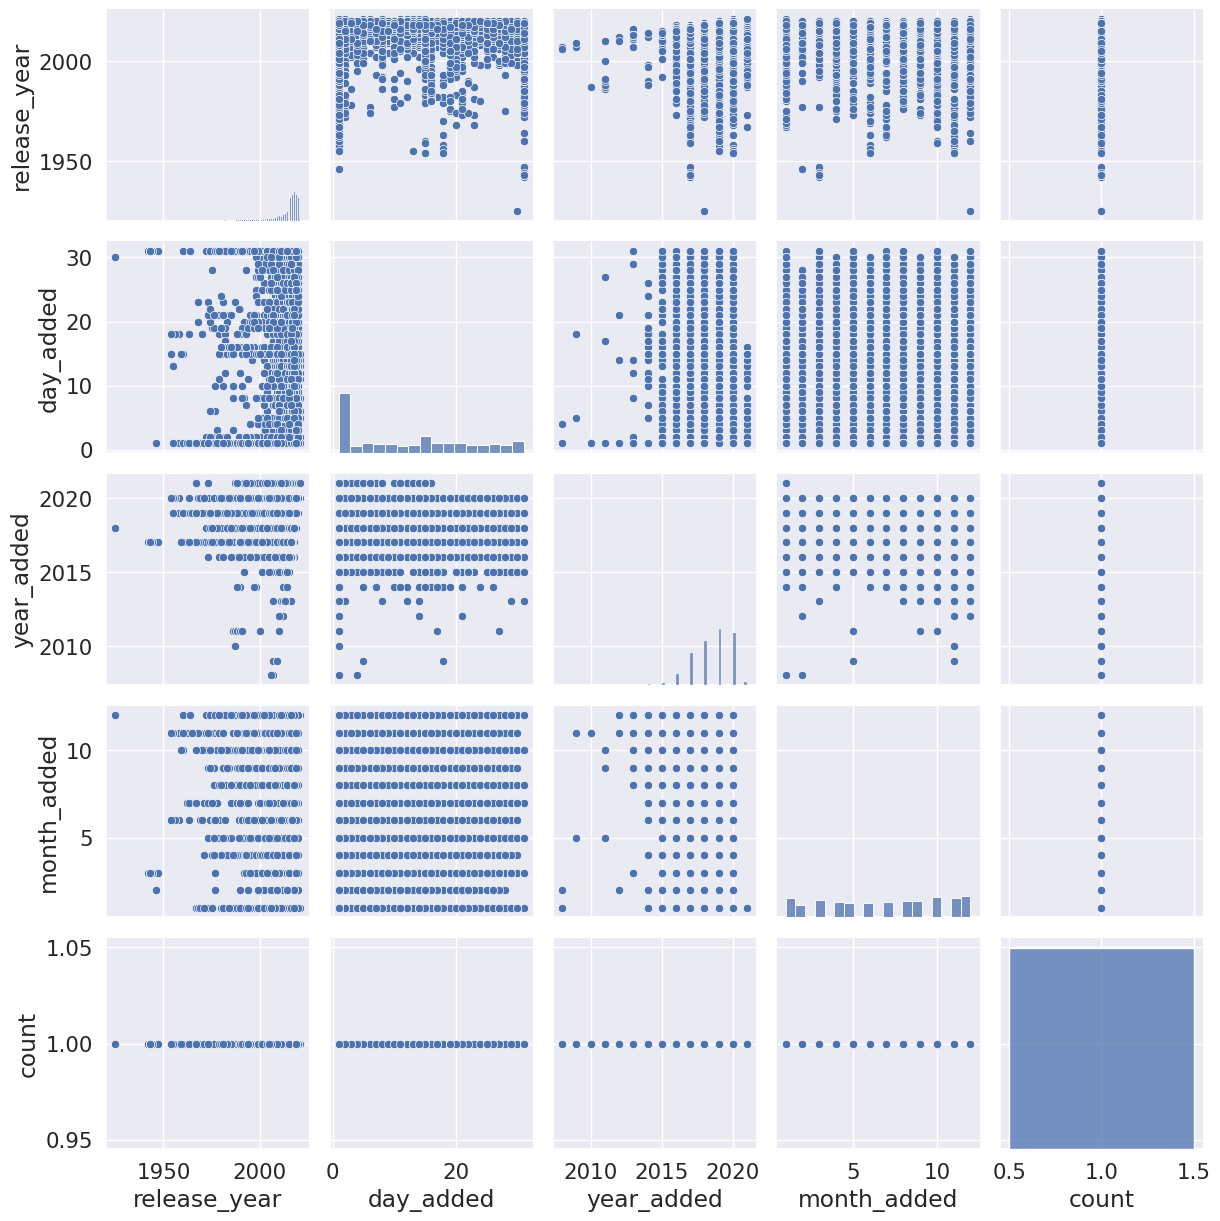

In [29]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis
sns.pairplot(data=content_df)

* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

* Movie release is not biased with respect to days or months, and no other relationship or trends can be observed from the pairplots.

###**Tableau Dashboard for Netflix Movies & TV Shows Clustering**

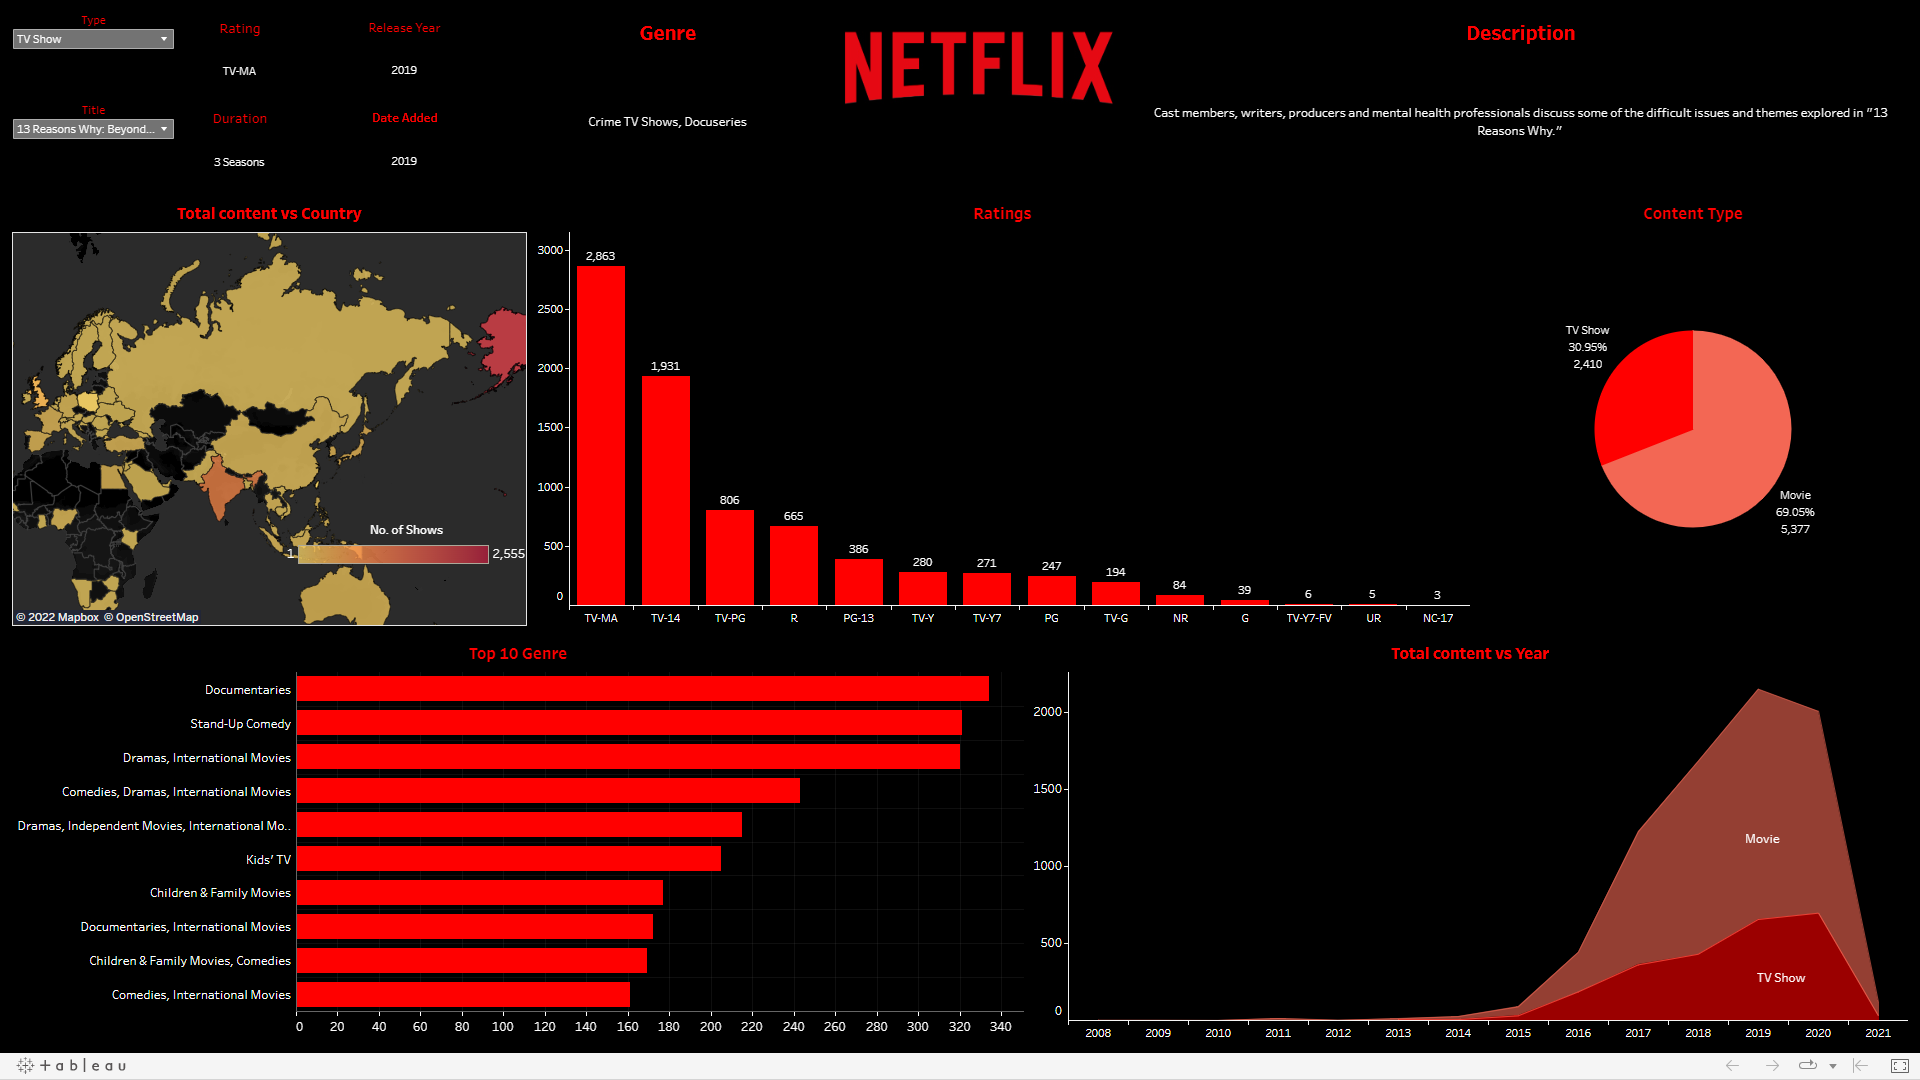

For interactive dashboard- [Click here](https://public.tableau.com/views/Netflixdasboard_16717379913640/NetflixDashboard?:language=en-US&:display_count=n&:origin=viz_share_link)  (please select fullscreen option given at bottom right corner of dashboard for better experience. )

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

*   H0 Hypothesis : Movies for kids and older kids are two hours long.

*   H1 Hypothesis : Movies for kids and older kids are not two hours long.

#### 2. Perform an appropriate statistical test.

In [30]:
# Making copy of df_clean_frame
hypothesis=content_df.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [31]:
# Perform Statistical Test to obtain P-Value
# Import stats
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
t-value -11.51992627853396


In [32]:
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [33]:
stats.t.ppf(0.975,dof)

1.9620900365868947

* A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

### Hypothetical Statement - 2

*   Null Hypothesis(H0) - The Country is independent of Target_ages.

*   Alternative Hypothesis(H1) - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [34]:
cont_table  = pd.crosstab(hypothesis.country, hypothesis.target_ages)
cont_table

target_ages                                        Kids  Older Kids  Teens  \
country                                                                      
Argentina                                             1           2      5   
Argentina, Brazil, France, Poland, Germany, De...     0           0      1   
Argentina, Chile                                      0           0      1   
Argentina, Chile, Peru                                0           0      0   
Argentina, France                                     0           0      0   
...                                                 ...         ...    ...   
Venezuela                                             0           0      1   
Venezuela, Colombia                                   0           0      0   
Vietnam                                               1           0      2   
West Germany                                          0           0      0   
Zimbabwe                                              1           0      0   

target_ages                                        Adults  
country                                                    
Argentina                                              26  
Argentina, Brazil, France, Poland, Germany, De...       0  
Argentina, Chile                                        0  
Argentina, Chile, Peru                                  1  
Argentina, France                                       1  
...                                                   ...  
Venezuela                                               0  
Venezuela, Colombia                                     1  
Vietnam                                                 2  
West Germany                                            1  
Zimbabwe                                                0  

[590 rows x 4 columns]

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 2490.454665821185, P-Value: 1.241778964066463e-27


* A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 3

*   Null Hypothesis(H0) - The Duration is independent of Target_ages.

*   Alternative Hypothesis(H1) - The Duration is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [36]:
cont_table_1  = pd.crosstab(hypothesis.target_ages, hypothesis.duration)
cont_table_1

duration     3    5    8    9    10   11   12   13   14   15   ...  208  209  \
target_ages                                                    ...             
Kids           1    0    0    1    1    2    0    0    0    0  ...    0    0   
Older Kids     0    0    0    0    0    0    1    1    1    2  ...    0    0   
Teens          0    1    1    0    0    0    0    0    2    0  ...    0    1   
Adults         0    0    0    0    0    0    1    0    0    0  ...    1    1   

duration     214  224  228  230  233  237  253  312  
target_ages                                          
Kids           0    0    0    0    0    0    0    0  
Older Kids     0    1    0    0    1    0    0    0  
Teens          1    0    1    1    0    1    1    0  
Adults         0    0    0    0    0    0    0    1  

[4 rows x 201 columns]

In [37]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table_1, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 1942.6913060752477, P-Value: 3.3536893054183175e-141


* A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Calling our function again to check null values after adding new columns
Complete_columns_info(content_df)

 selected dataframe has 17 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1512   
month_added                  10               0.1                   12   
year_added                   10               0.1                   14   
day_added                    10               0.1                   31   
rating                        7               0.1                   14   
ratings_cat                   7               0.1                    4   
description                   0               0.0                 7769   
show_id                       0               0.0                 7787   
listed_in                     0               0.0                  492   
duration                      0               0.0                  216   
type                          0               0.0                    2   
release_year                  0               0.0                   73   
title                         0               0.0                 7787   
count                         0               0.0                    1   

                   Data Type  
director              string  
cast                  string  
country               string  
date_added    datetime64[ns]  
month_added          float64  
year_added           float64  
day_added            float64  
rating                string  
ratings_cat         category  
description           string  
show_id               object  
listed_in             string  
duration              object  
type                  string  
release_year           int64  
title                 string  
count                  int64

In [39]:
# Handling Missing Values & Missing Value Imputation
content_df['director'].fillna('unknown', inplace=True)
content_df['cast'].fillna('unknown', inplace=True)
content_df['country'].fillna(value=content_df['country'].mode()[0],inplace=True)
content_df.dropna(subset=['date_added','day_added','year_added','month_added','rating','ratings_cat'],inplace=True)

In [40]:
# Lets check again
Complete_columns_info(content_df)

 selected dataframe has 17 columns and 7770 rows


No of Null Values  % of null values  No of unique values  \
show_id                       0               0.0                 7770   
duration                      0               0.0                  216   
ratings_cat                   0               0.0                    4   
month_added                   0               0.0                   12   
year_added                    0               0.0                   14   
day_added                     0               0.0                   31   
description                   0               0.0                 7752   
listed_in                     0               0.0                  491   
rating                        0               0.0                   14   
type                          0               0.0                    2   
release_year                  0               0.0                   73   
date_added                    0               0.0                 1511   
country                       0               0.0                  681   
cast                          0               0.0                 6818   
director                      0               0.0                 4048   
title                         0               0.0                 7770   
count                         0               0.0                    1   

                   Data Type  
show_id               object  
duration              object  
ratings_cat         category  
month_added          float64  
year_added           float64  
day_added            float64  
description           string  
listed_in             string  
rating                string  
type                  string  
release_year           int64  
date_added    datetime64[ns]  
country               string  
cast                  string  
director              string  
title                 string  
count                  int64

* Null values of country column were replaced by mode of thet column, as a country producing most of the content might be a better option for replacement of null value.

* Director and cast columns with maximum nnumber of null values cannot be replaced with mode therefore we have replaced them with "unknown".

* Other columns mentioned in above frame, null values have been dropped, as there were very few null values in the columns.

### 2. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [41]:
# Expand Contraction
cluster_df = content_df[['title']]
cluster_df['cluster_data'] = (content_df['description'] + ' ' + content_df['listed_in'] + ' ' + content_df['director'] + ' ' + content_df['cast'] + ' ' + content_df['country'] + ' ' + content_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [42]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

#### 3. Removing Punctuations

In [43]:
# Remove punctuation from the text :

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(5)

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalyptic world ragdoll robots hide...
21     a brilliant group of students become cardcount...

#### 4. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

#### 5. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [46]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(5)

cluster_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...
23:59  armi recruit found dead fellow soldier forc co...
9      postapocalypt world ragdol robot hide fear dan...
21     brilliant group student becom cardcount expert...

In [47]:
bag_of_words = cluster_df.cluster_data

In [48]:
content_df['Length(listed_in)'] = content_df['listed_in'].apply(lambda x: len(x))
content_df['Length(description)'] = content_df['description'].apply(lambda x: len(x))

content_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added ratings_cat  count  Length(listed_in)  Length(description)  
0          8.0      Adults      1                 54                  136  
1         12.0      Adults      1                 28                  148  
2         12.0      Adults      1                 35                  149  
3         11.0       Teens      1                 56                  145  
4          1.0       Teens      1                  6                  143

* We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.

#### 6. Text Vectorization

In [49]:
# Text Vectorization
content_df['description'] = content_df['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 17888)

* TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

### 3. Data Scaling

In [50]:
# Scaling your data
X_features = content_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features.describe()

Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            143.101287          33.372458
std              10.618177          15.018409
min              61.000000           6.000000
25%             140.000000          23.000000
50%             146.000000          34.000000
75%             149.000000          47.000000
max             248.000000          79.000000

In [51]:
# Scaling your data
X_rescale=stdscaler.fit_transform(X_features)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [52]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.3941905094189749
For n_clusters = 3, silhouette score is 0.43498587872384165
For n_clusters = 4, silhouette score is 0.4474346057530305
For n_clusters = 5, silhouette score is 0.4179451658408099
For n_clusters = 6, silhouette score is 0.42670886743010633
For n_clusters = 7, silhouette score is 0.432221471075133
For n_clusters = 8, silhouette score is 0.4201024050479622
For n_clusters = 9, silhouette score is 0.39525128280830873
For n_clusters = 10, silhouette score is 0.39648976454038576
For n_clusters = 11, silhouette score is 0.3925724085851438
For n_clusters = 12, silhouette score is 0.3904466449527353
For n_clusters = 13, silhouette score is 0.39444983774713904
For n_clusters = 14, silhouette score is 0.39267517595277823
For n_clusters = 15, silhouette score is 0.3937551118311676


### 4. Dimesionality Reduction

 Dimension reduction is very important as

*    Fewer features mean less complexity.

*   You will need less storage space because you have fewer data.


*   Fewer features require less computation time.
*   Model accuracy improves due to less misleading data.

*   Algorithms train faster thanks to fewer data.
*   Reducing the data set’s feature dimensions helps visualize the data faster.

*   It removes noise and redundant features.

In [53]:
# Dimensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

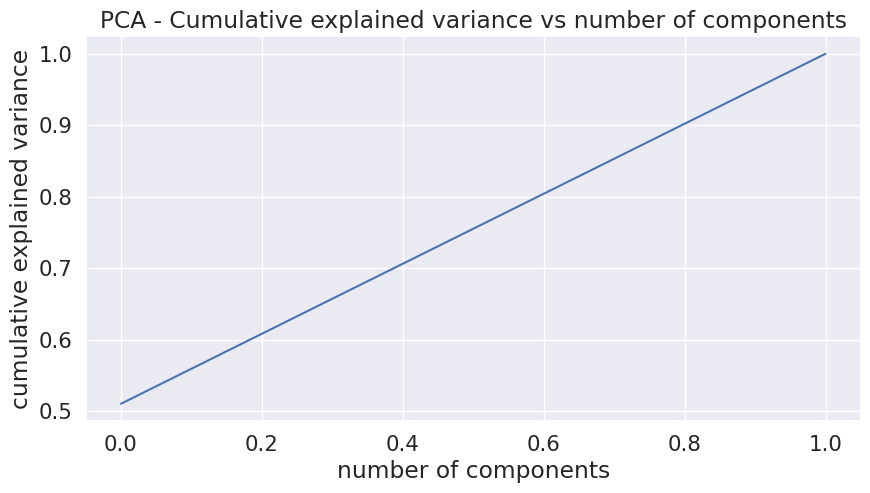

In [54]:
# Cumulative explained variance vs number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [55]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)

In [56]:
# Shape of transformed vectors
x_pca.shape

(7770, 2)

* We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

## ***7. ML Model Implementation***

### **ML Model - 1 - K means**

In [57]:
# ML Model - 1 K means
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model
clusters = model.predict(X)

In [58]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.44761470302252365


In [59]:
# Adding a seperate column for the clusters L:
content_df["Cluster Label"] = clusters
content_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added ratings_cat  count  Length(listed_in)  Length(description)  \
0          8.0      Adults      1                 54                  136   
1         12.0      Adults      1                 28                  148   
2         12.0      Adults      1                 35                  149   
3         11.0       Teens      1                 56                  145   
4          1.0       Teens      1                  6                  143   

   Cluster Label  
0              1  
1              0  
2              1  
3              1  
4              0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

n clusters  silhouette score
2            4              0.45
1            3              0.43
4            6              0.43
5            7              0.43
3            5              0.42
6            8              0.42
7            9              0.40
8           10              0.40
0            2              0.39
9           11              0.39
10          12              0.39
11          13              0.39
12          14              0.39
13          15              0.39

For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

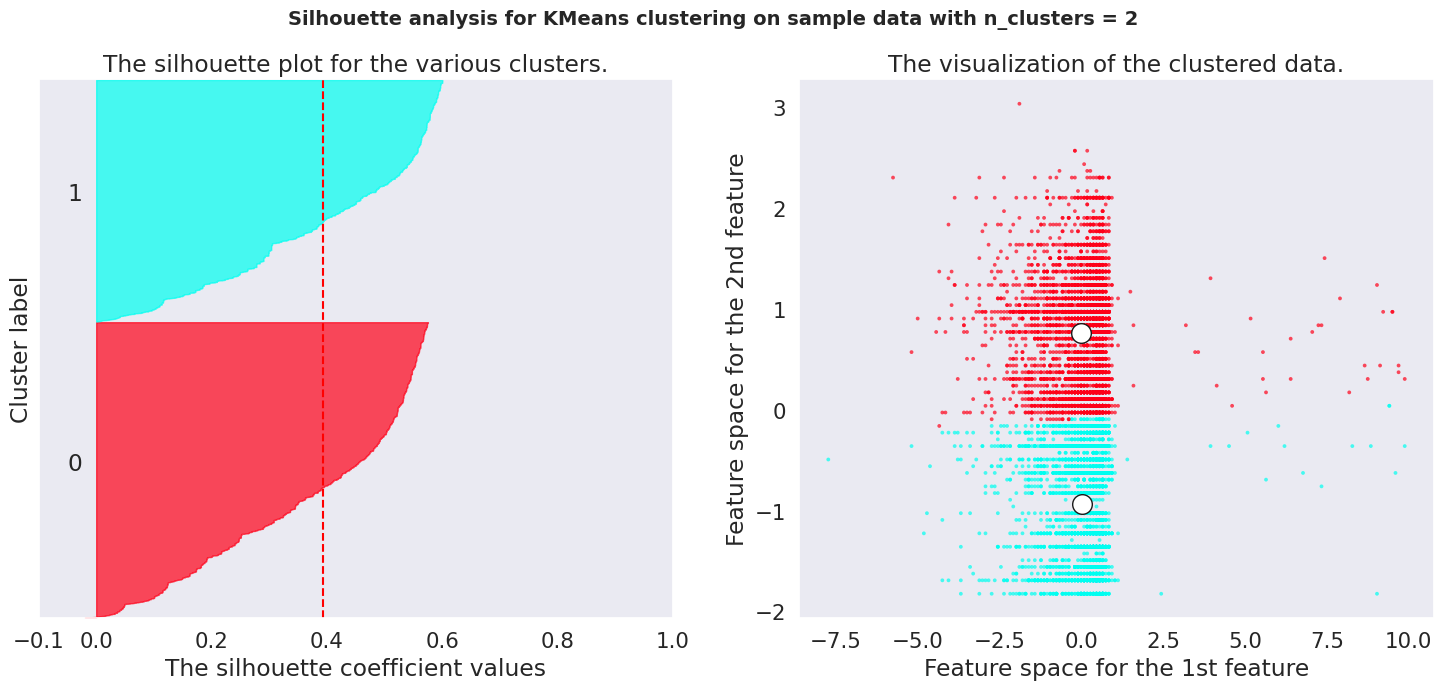

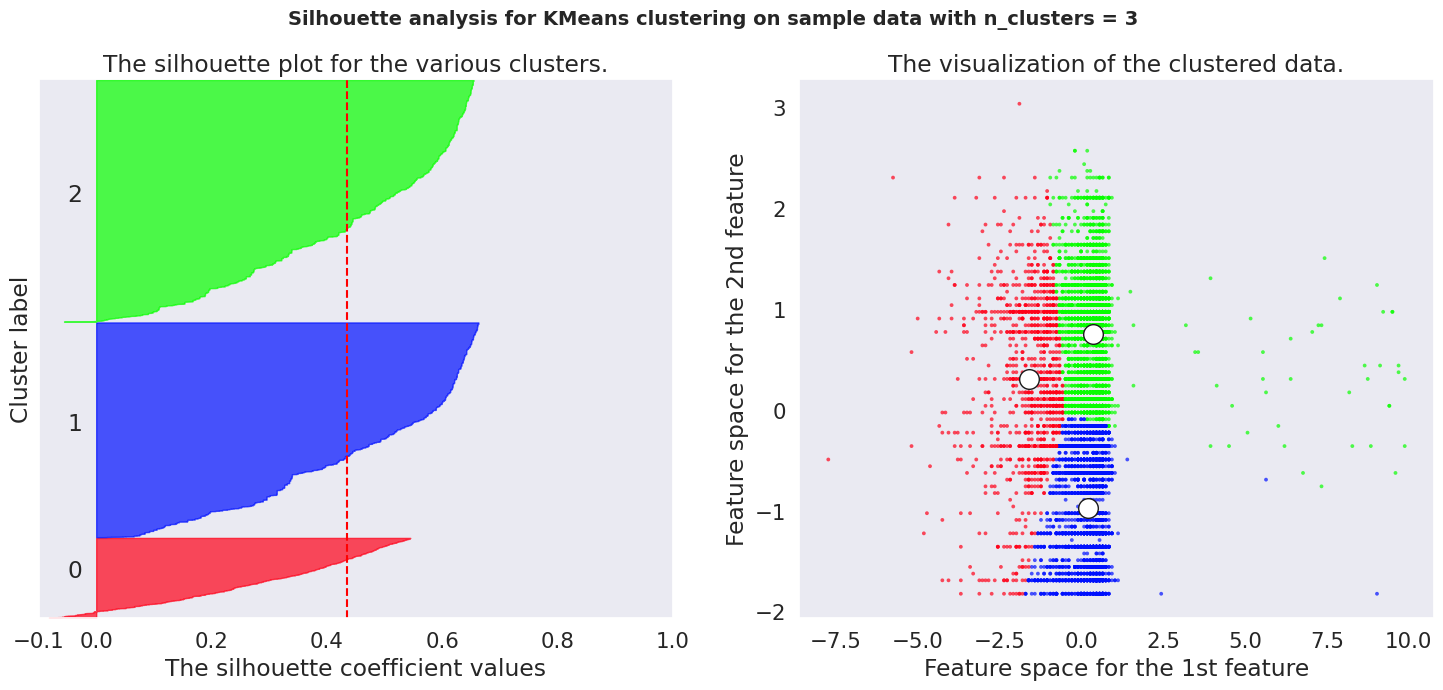

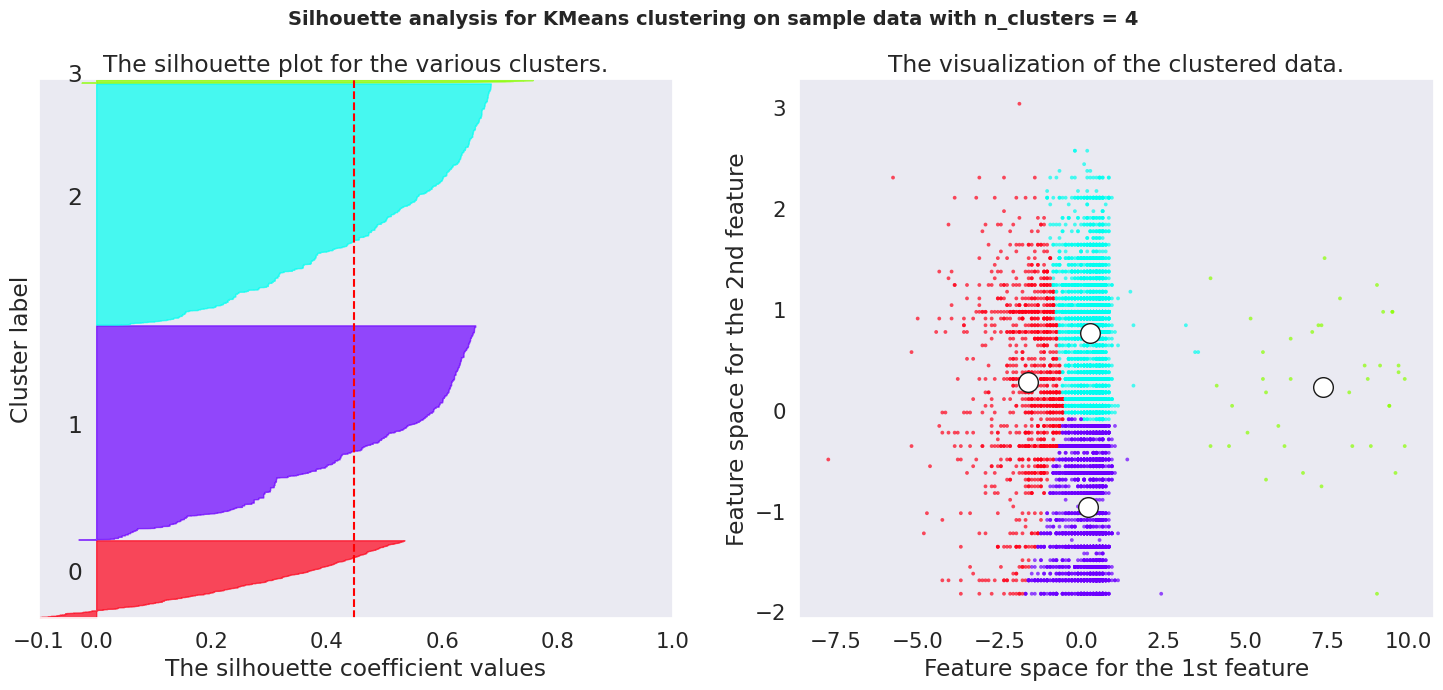

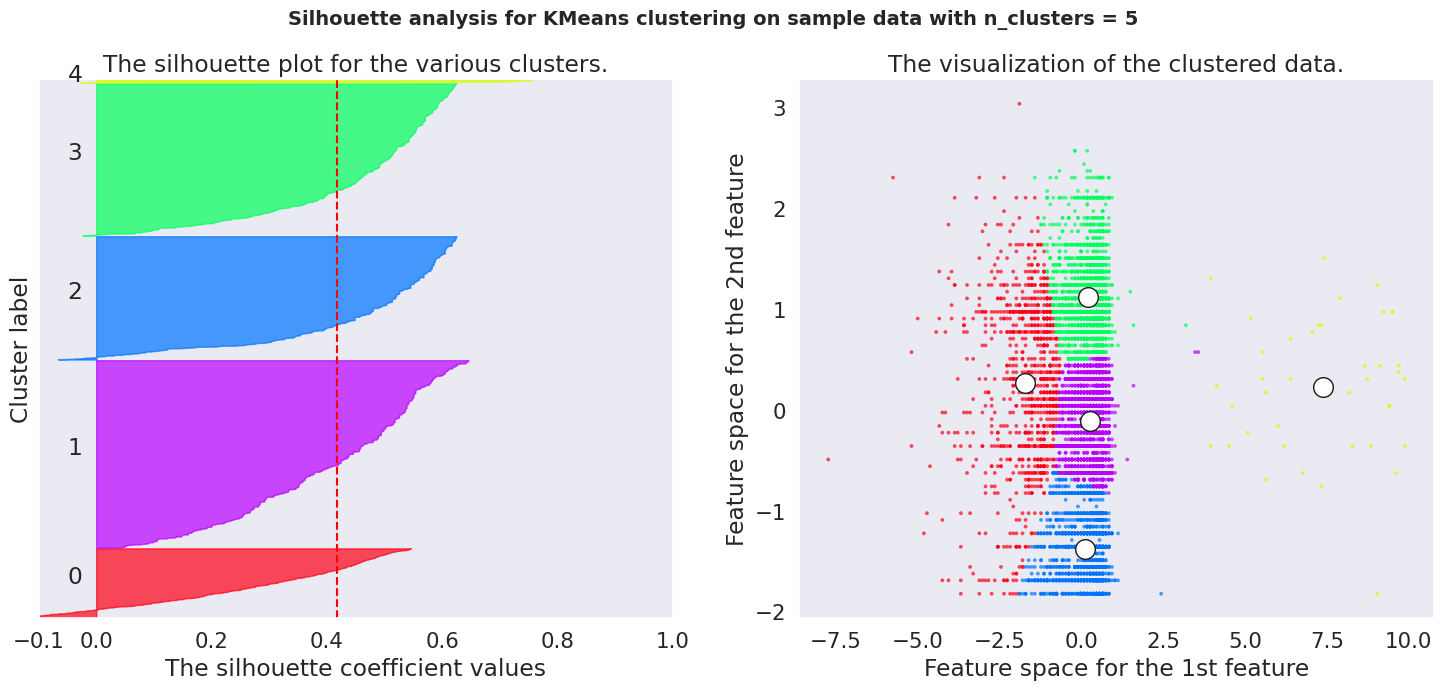

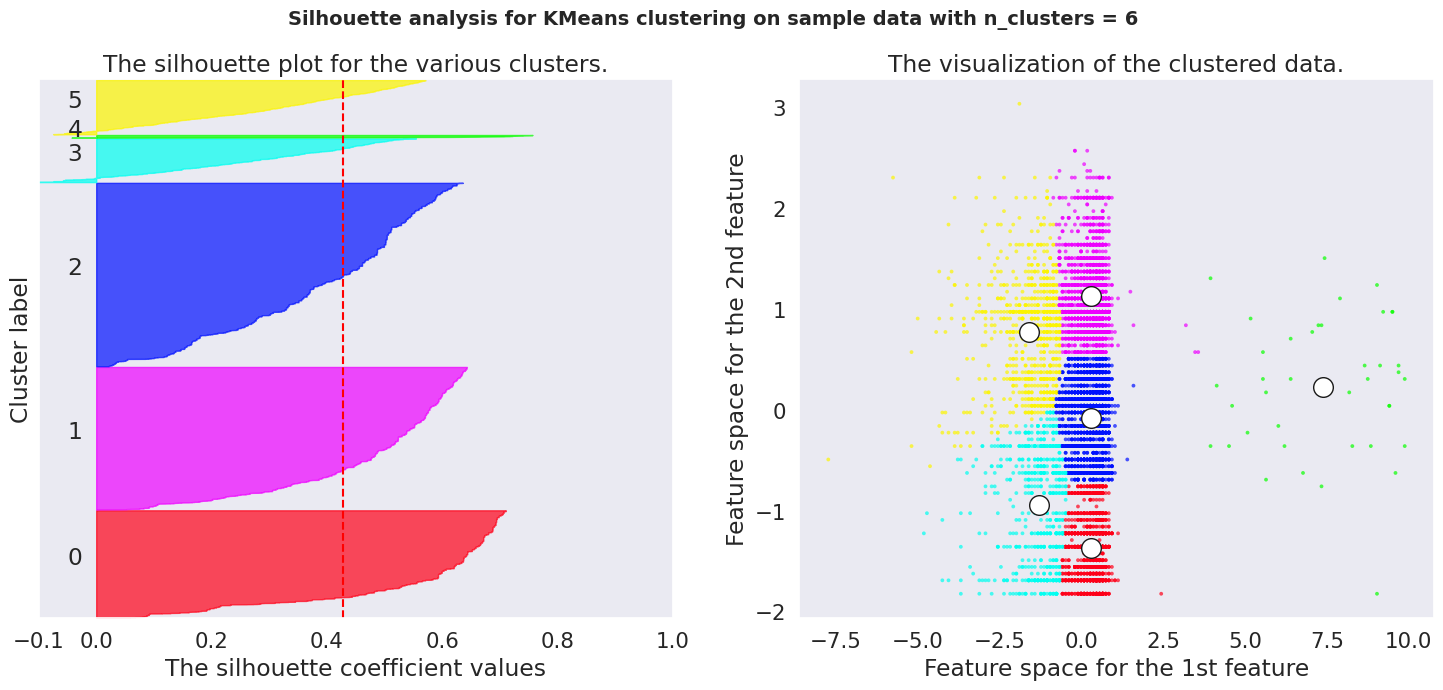

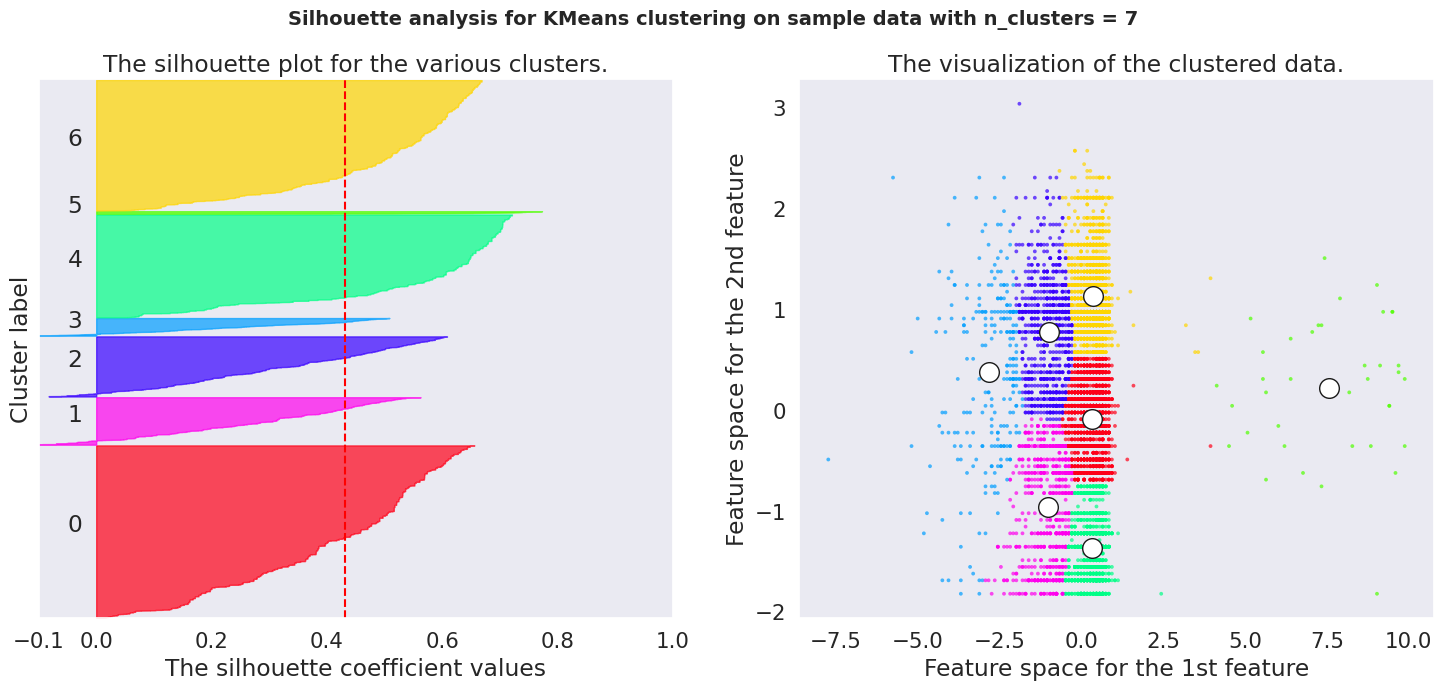

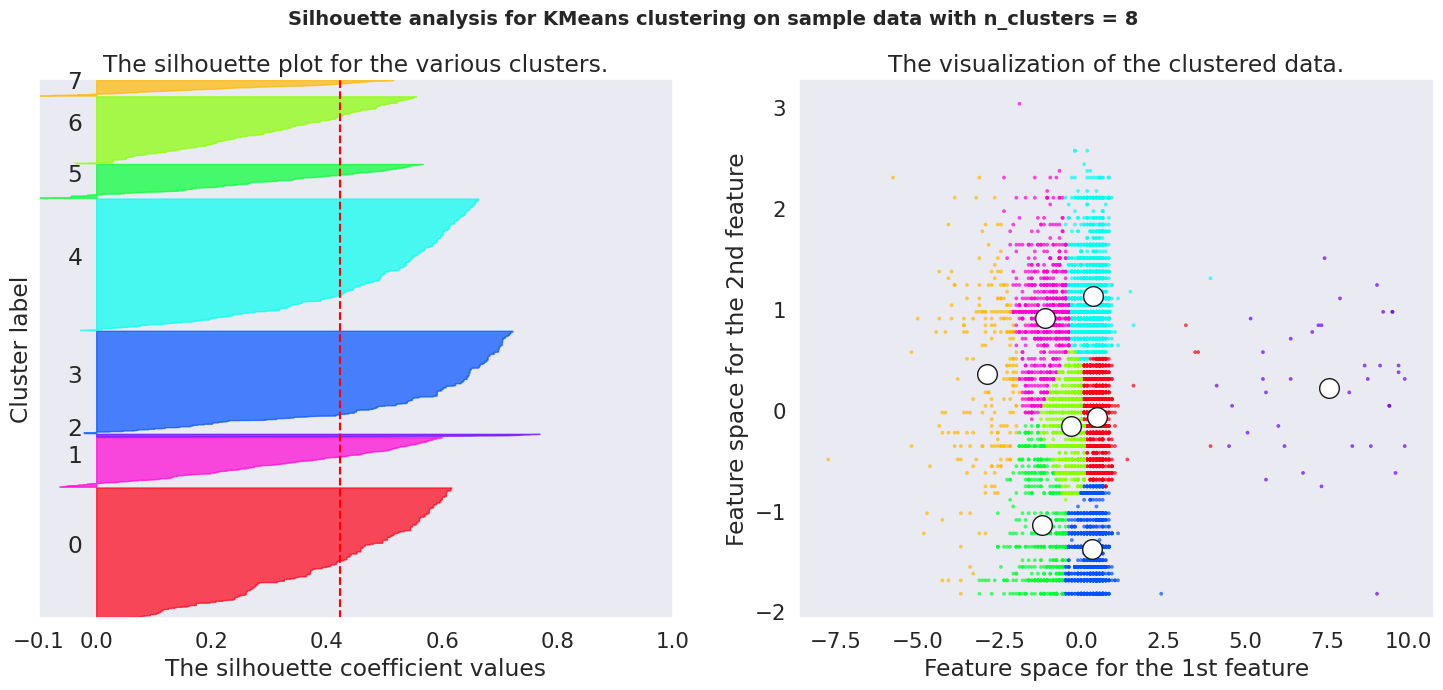

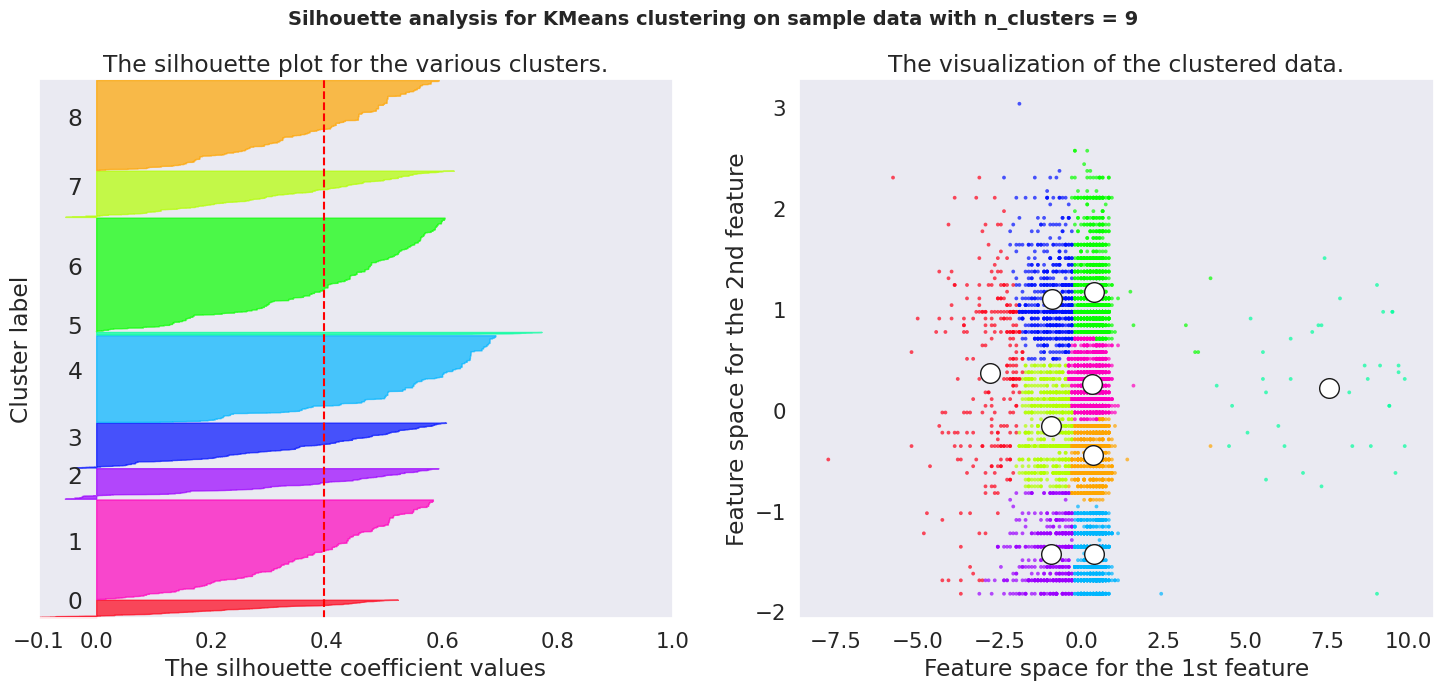

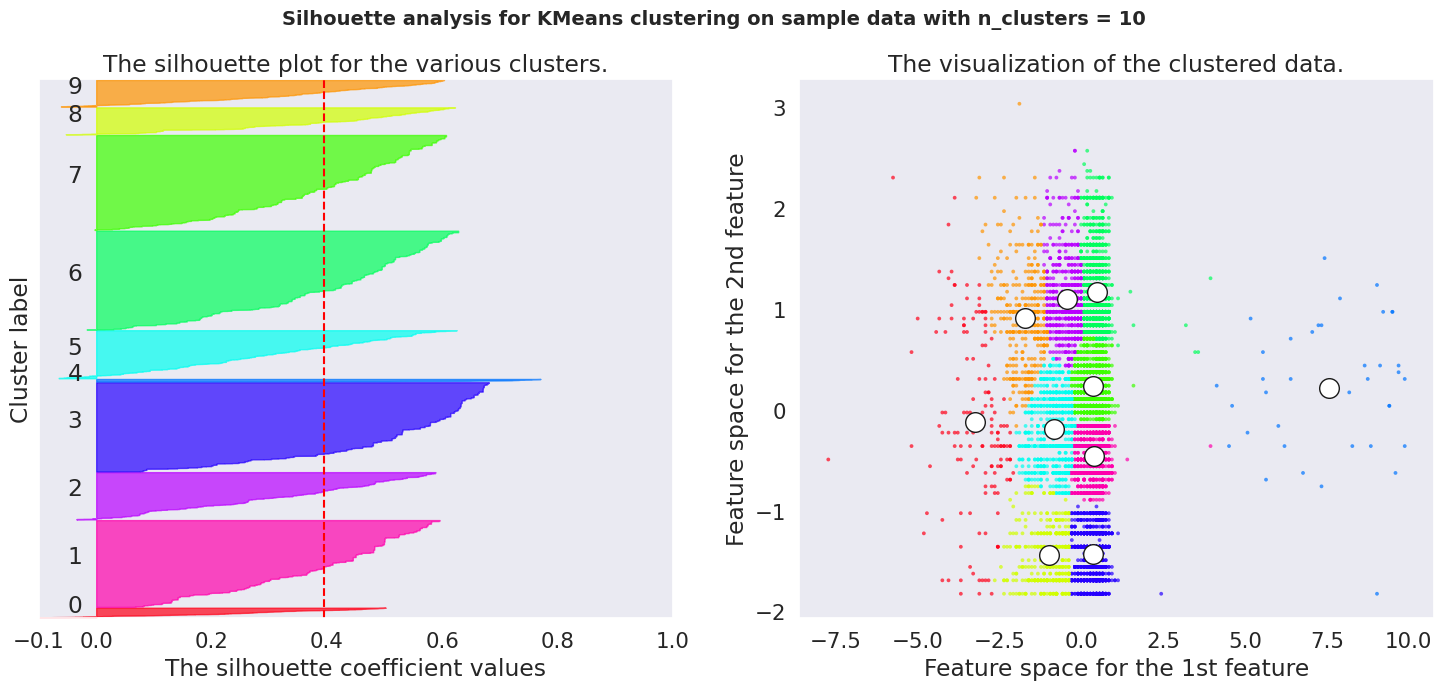

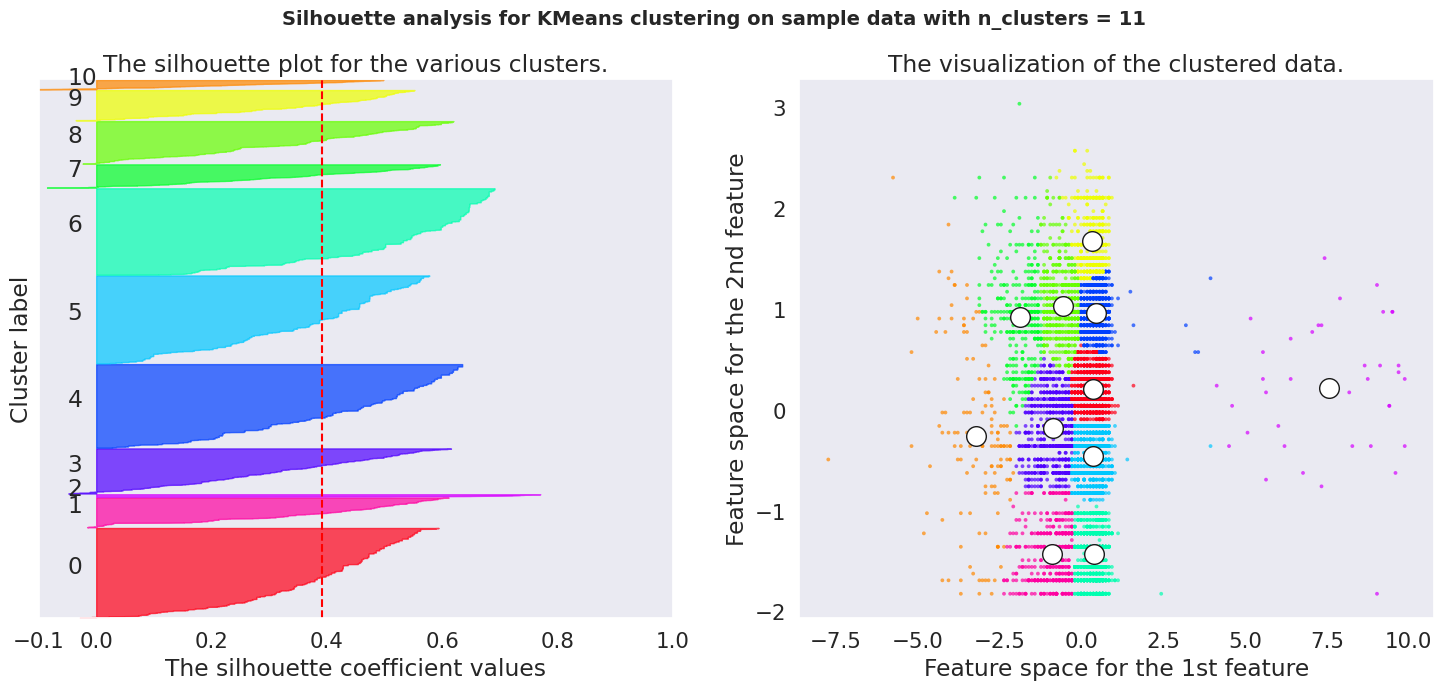

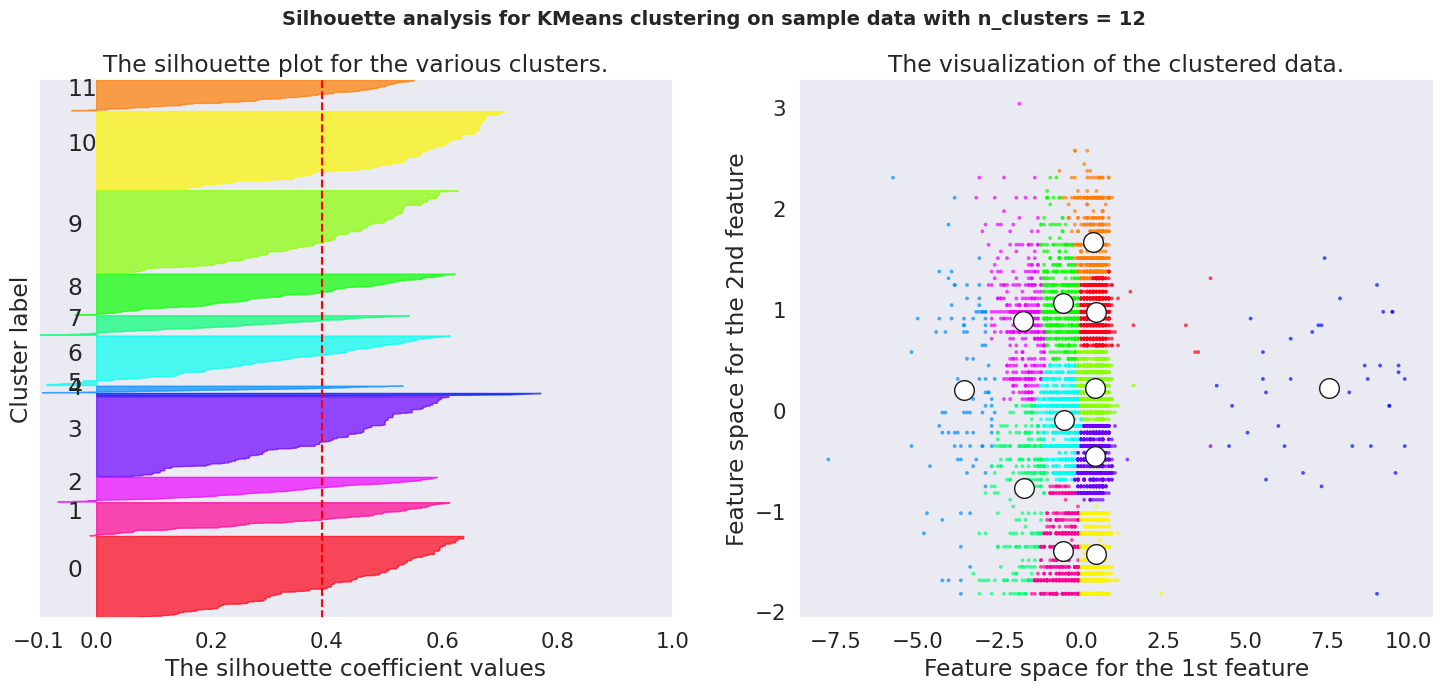

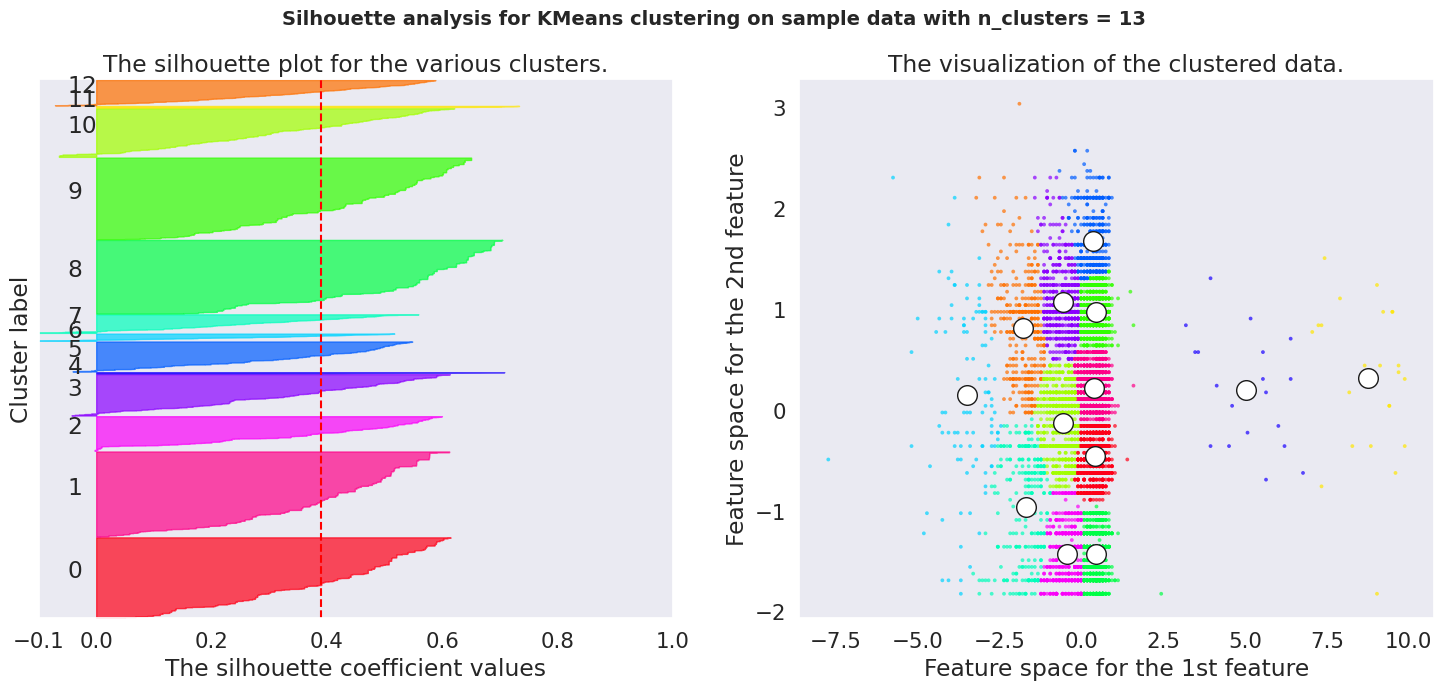

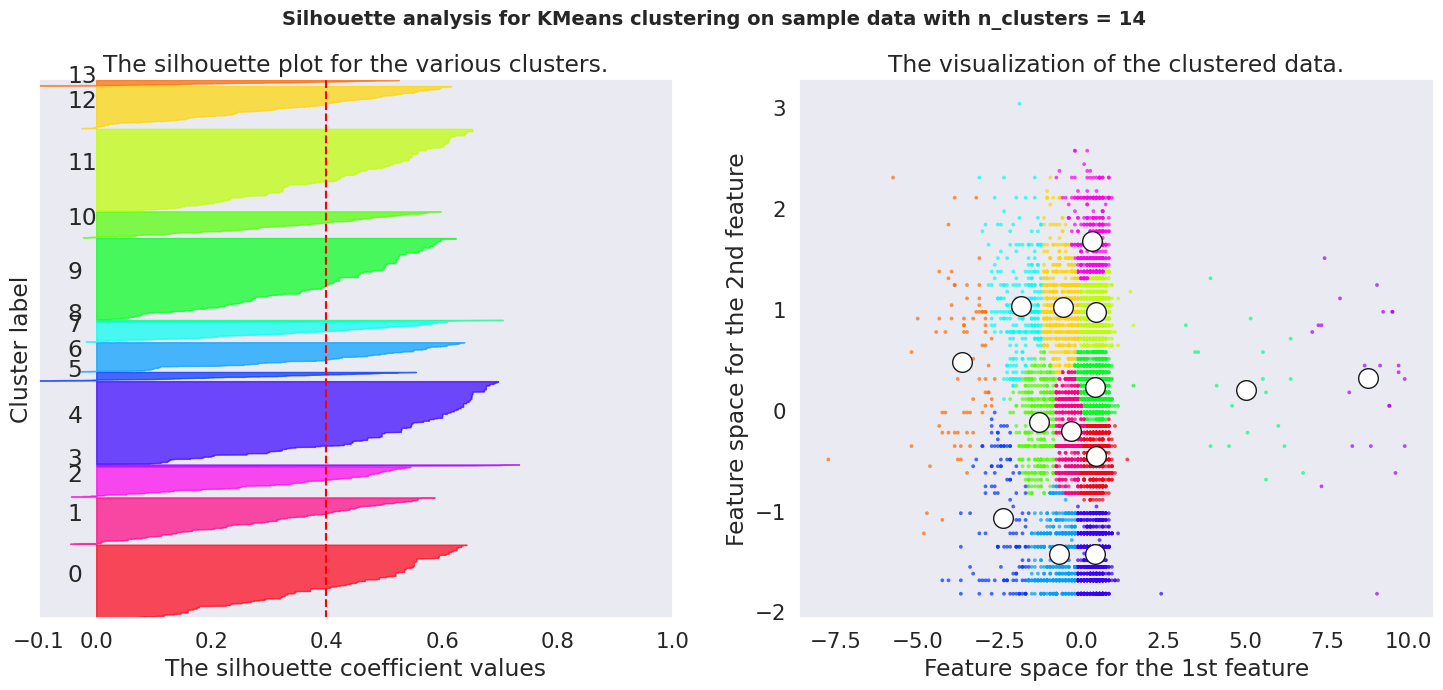

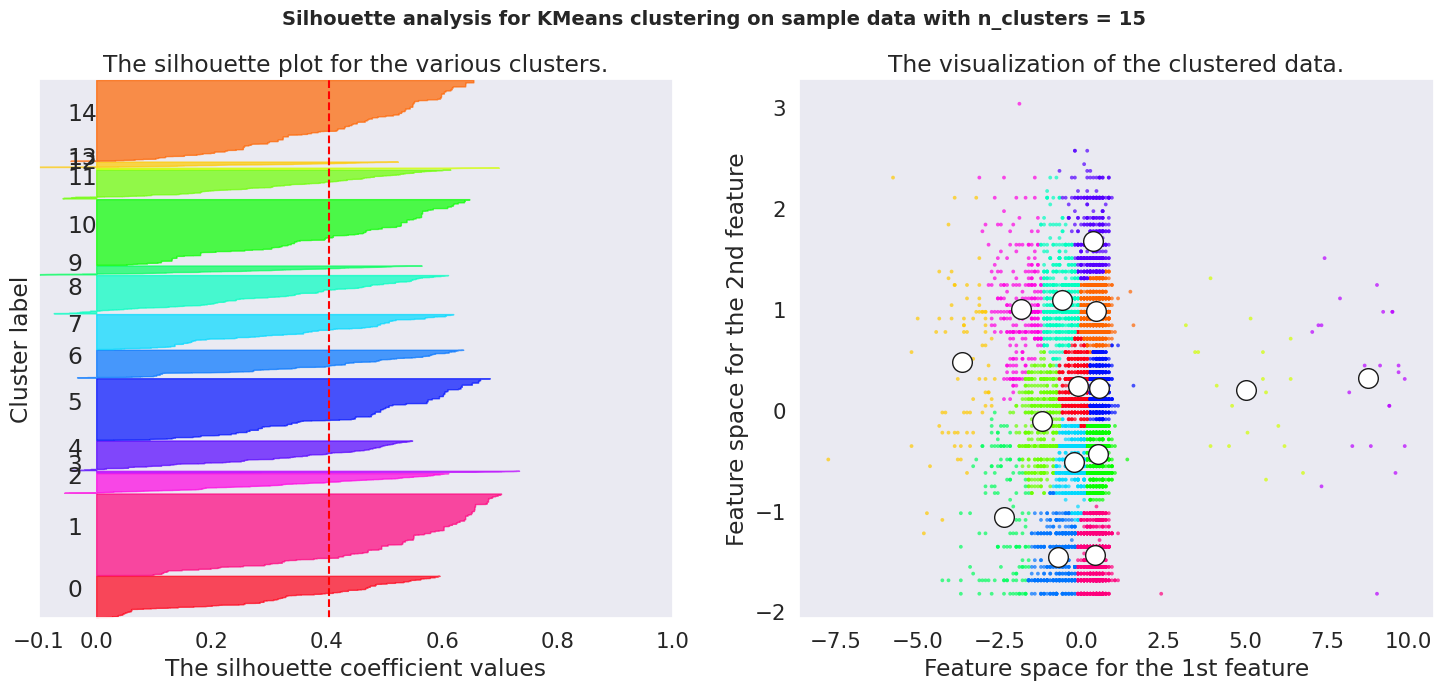

In [61]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **ML Model - 2    Elbow Curve**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

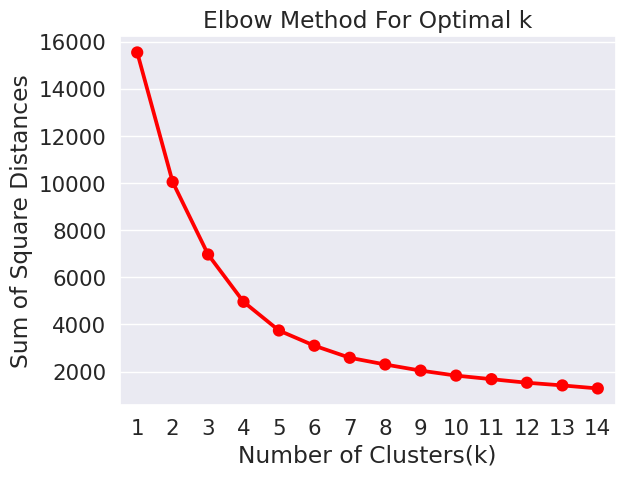

In [62]:
# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [63]:
# ML Model - 2 Implementation
kmeans = KMeans(n_clusters = 6 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

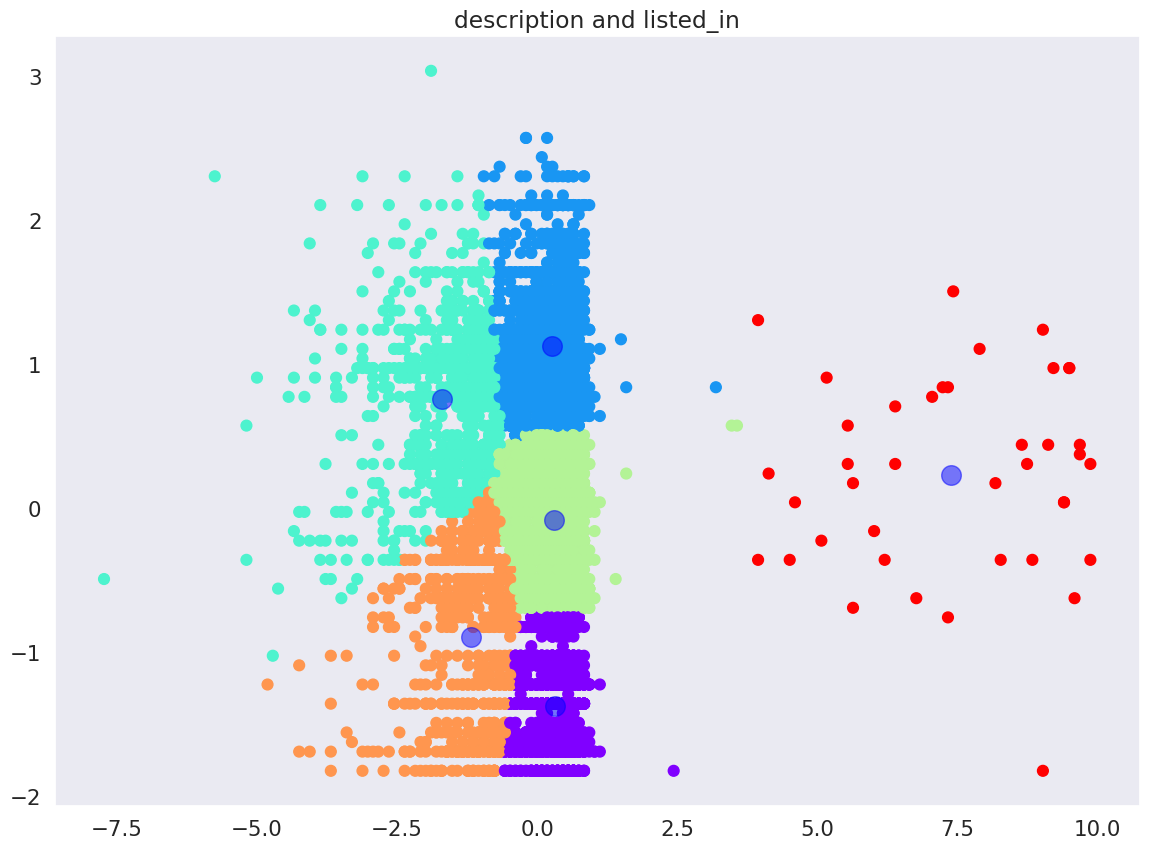

In [64]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
plt.show()


Oservation : K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation.

### **ML Model - 3 DBSCAN**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

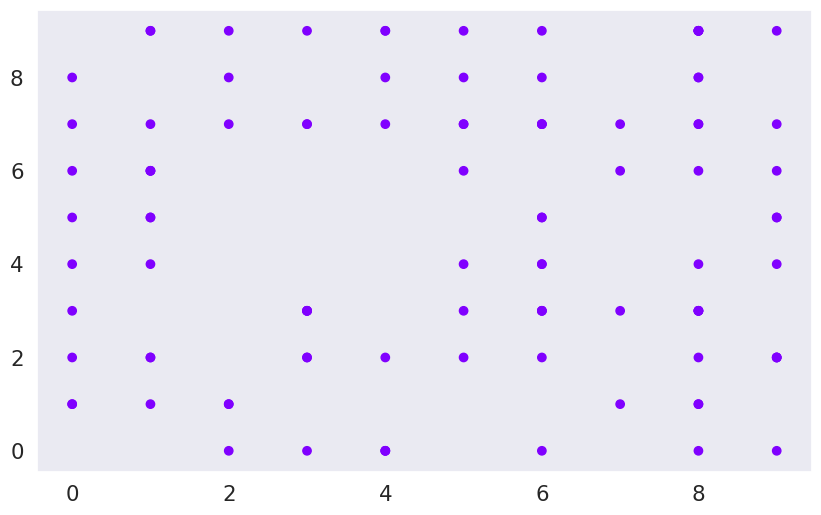

In [66]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
X = np.random.randint(0, 10, (100, 2))
# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=20)
# Fit and predict labels
y_pred = dbscan.fit_predict(X)
# Plot the data
plt.figure(figsize=(10, 6))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.show()


Observation: DBSCAN algorithm identifies the dense region by grouping together data points that are close to eachother based on distance measurement. we observed that cluster is getting dense towards the centre, and is bit spreaded towards the extreme ends. Thus, it will not be suitable algorithm for clustering studies.

### **ML Model - 4  : Hierarchical clustering.**

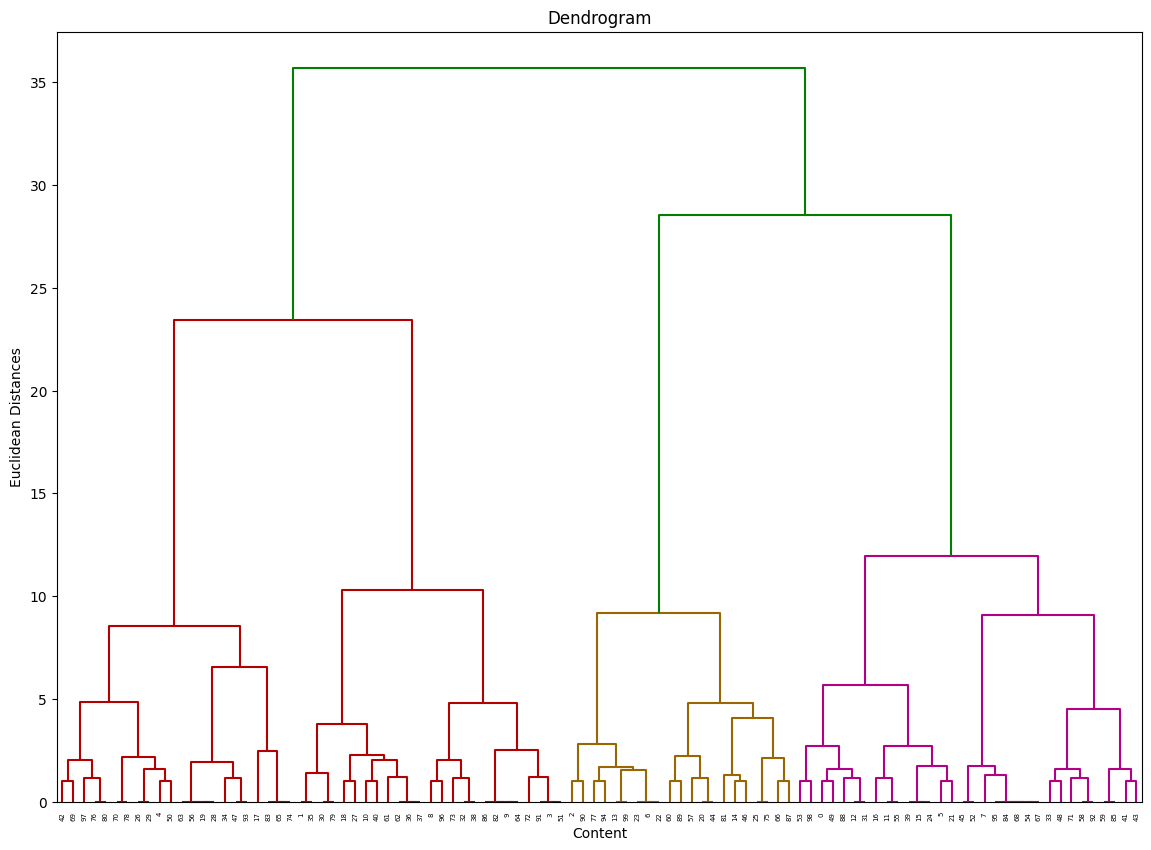

In [67]:
#  importing sch :
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
# find largest vertical distance we can make without crossing any other horizontal line :
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

Observation: Here we can observe 3-4 major clusters  and there there smilarities.

### **ML Model - 5 Agglomerative Clustering**

In [68]:
# Model 5 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
# predict on the model
y_hc = hc.fit_predict(X)

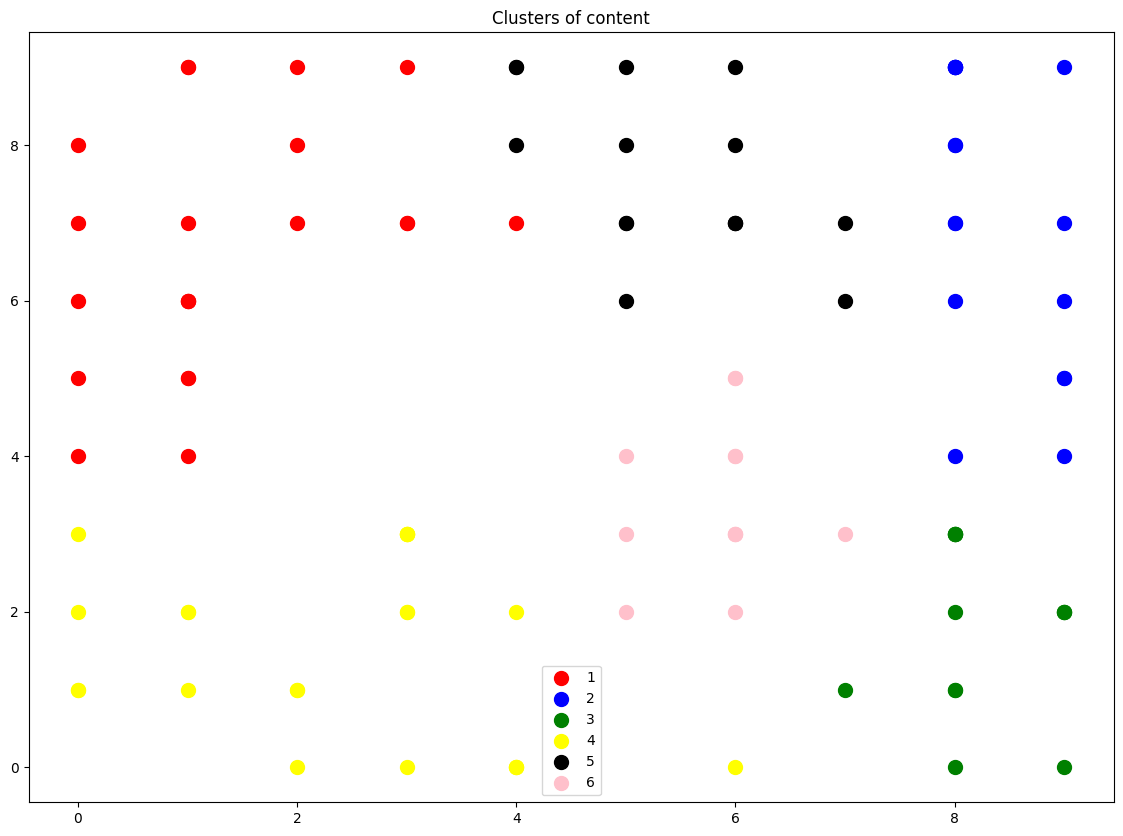

In [69]:
# Visualizing the clusters :
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'yellow', 'black', 'pink']
plt.figure(figsize=(14, 10))
for cluster_num, color in enumerate(colors):
    plt.scatter(X[y_hc == cluster_num, 0], X[y_hc == cluster_num, 1], s=100, c=color, label=str(cluster_num+1))
plt.grid(False)
plt.title('Clusters of content')
plt.legend()
plt.show()


In [70]:
# Run TF IDF Vectorizer on the text data :

from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(content_df["listed_in"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names_out()).head()

action  action adventure  adventure  adventure anime  adventure children  \
0  0.00000           0.00000    0.00000              0.0                 0.0   
1  0.00000           0.00000    0.00000              0.0                 0.0   
2  0.00000           0.00000    0.00000              0.0                 0.0   
3  0.21135           0.21135    0.21135              0.0                 0.0   
4  0.00000           0.00000    0.00000              0.0                 0.0   

   adventure classic  adventure comedies  adventure dramas  adventure horror  \
0                0.0                 0.0               0.0               0.0   
1                0.0                 0.0               0.0               0.0   
2                0.0                 0.0               0.0               0.0   
3                0.0                 0.0               0.0               0.0   
4                0.0                 0.0               0.0               0.0   

   adventure independent  ...  tv dramas  tv horror  tv korean  tv mysteries  \
0               0.000000  ...   0.228523        0.0        0.0           0.0   
1               0.000000  ...   0.000000        0.0        0.0           0.0   
2               0.000000  ...   0.000000        0.0        0.0           0.0   
3               0.476294  ...   0.000000        0.0        0.0           0.0   
4               0.000000  ...   0.000000        0.0        0.0           0.0   

   tv romantic    tv sci  tv shows  tv spanish  tv thrillers  tv tv  
0          0.0  0.378081   0.17468         0.0           0.0    0.0  
1          0.0  0.000000   0.00000         0.0           0.0    0.0  
2          0.0  0.000000   0.00000         0.0           0.0    0.0  
3          0.0  0.000000   0.00000         0.0           0.0    0.0  
4          0.0  0.000000   0.00000         0.0           0.0    0.0  

[5 rows x 164 columns]

# **Recommendation System**

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(["This is a sentence.", "This is another sentence."])
df = pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["tf-idf score"])
print(df.to_string())

          tf-idf score
another        0.00000
is             0.57735
sentence       0.57735
this           0.57735


In [72]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline
pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(content_df['description'])
print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(content_df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))


CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [73]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names_out(), columns=['idf_weights'])

idf_weights
000        6.402806
007        8.348716
009        9.265007
10         6.244582
100        7.250104
...             ...
ömer       9.265007
über       8.859542
łukasz     9.265007
ōarai      9.265007
şeref      9.265007

[17888 rows x 1 columns]

* Cosine similarity recommender

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [75]:
programme_list=content_df['title'].to_list()

In [76]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11]
    recommend_index = [i[0] for i in sim_score]
    rec_movie = content_df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

# **Conclusion**

### Conclusion of EDA:
* Netflix have ~70% of movies and 30% of TV_shows in 2019.
* Comedy is most popular genre in Netflix, across all content.
* Netflix focuses to add new content majorly towards end of current year and start of new year.
* A sudden drop was obserbed after 2020 in count of new content, Which is because of covid pandemic.
* India is on 2nd place as compared to content availability, maximum content is available for United states.
* There are almost ~30% of netflix original movies and ~50 % TV-shows.
* Content category and countries:
  * Maximum adult content is from Spain.
  * Maximum teen content is from India.
  * Maximum older kids content is from Japan.
  * Maximum kids content is from Canada.
* All of this insights will be neccesary for business development and SWOT analysis.


### Conclusion for clustering.
* We tried 5 models for ML i.e.
  * K-means clustering
  * Elbow curve
  * DBSCAN
  * Hierarchical clustering
  * Agglomerative clustering

* K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation.

* Thus K-means clustering will be best for this data set.
* Cosine based recommender system was working really well.











